## Classification of Myocardial Infarction (Commonly known as “Heart attack”)  

### Business Problem :<br>
`Myocardial Infarction(Commonly known as “Heart attack”)  is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which are exposed to chronic stress factors, irregular and not always balanced nutrition.`

`The Given dataset consists of 124 variables with 1700 records of patients. Classify the Lethal outcome (cause) (LET_IS)(Y variable) by using the given dataset.`


`Risk factors
Heart attack risk factors include:`

1.Age <br>
2.Tobacco use <br>
3.High blood pressure <br>
4.High cholesterol or triglycerides <br>
5.Obesity <br>
6.Diabetes <br>
7.Metabolic syndrome <br> 
8.Family history of heart attacks <br>
9.Not enough exercise <br> 
10.Unhealthy diet <br>
11.Stress <br>
12.Illegal drug use <br>
13.A history of preeclampsia  <br>
14.An autoimmune condition <br>

In [1]:
# !pip install xgboost
# !pip install mlxtend

In [2]:
# !pip install dtale

In [3]:
#importing requried libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingCVClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
import itertools
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
import pickle
import dtale

In [4]:
#reading csv file using pandas
data = pd.read_csv('Myocardial infarction complications.csv')

### Performing EDA

In [5]:
# Assigning a reference to a running D-Tale process
dt = dtale.show(data)
dt

In [6]:
#displaying  first 5 records 
data.head()

ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   
4         0.0  ...          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  
1         0    0       0          0       0  
2         0    0       0          0       0  
3         0    1       0          0       0  
4         0    0       0          0       0  

[5 rows x 124 columns]

In [7]:
#displaying last 5 records
data.tail()

ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
1695  1696  77.0    0       0.0        4.0        2.0       1.0       NaN   
1696  1697  70.0    0       0.0        6.0        2.0       1.0       NaN   
1697  1698  55.0    1       3.0        6.0        2.0       2.0       NaN   
1698  1699  79.0    0       2.0        2.0        2.0       1.0       NaN   
1699  1700  63.0    1       2.0        NaN        NaN       NaN       NaN   

       GB  SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
1695  2.0         0.0  ...          0           0         1          0   
1696  2.0         0.0  ...          0           0         0          0   
1697  0.0         0.0  ...          0           0         0          0   
1698  2.0         0.0  ...          0           0         0          1   
1699  2.0         0.0  ...          0           0         0          0   

      RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
1695       1         0    0       0          0       3  
1696       0         0    0       0          0       1  
1697       0         0    0       1          0       6  
1698       0         0    0       0          0       1  
1699       0         0    0       0          0       1  

[5 rows x 124 columns]

In [8]:
data.drop('ID',axis=1,inplace=True)

In [9]:
data

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0     77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1     55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2     52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3     68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4     60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   
...    ...  ...       ...        ...        ...       ...       ...  ...   
1695  77.0    0       0.0        4.0        2.0       1.0       NaN  2.0   
1696  70.0    0       0.0        6.0        2.0       1.0       NaN  2.0   
1697  55.0    1       3.0        6.0        2.0       2.0       NaN  0.0   
1698  79.0    0       2.0        2.0        2.0       1.0       NaN  2.0   
1699  63.0    1       2.0        NaN        NaN       NaN       NaN  2.0   

      SIM_GIPERT  DLIT_AG  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0            0.0      7.0  ...          0           0         0          0   
1            0.0      0.0  ...          0           0         0          0   
2            0.0      2.0  ...          0           0         0          0   
3            0.0      3.0  ...          0           0         0          0   
4            0.0      7.0  ...          0           0         0          0   
...          ...      ...  ...        ...         ...       ...        ...   
1695         0.0      7.0  ...          0           0         1          0   
1696         0.0      7.0  ...          0           0         0          0   
1697         0.0      0.0  ...          0           0         0          0   
1698         0.0      7.0  ...          0           0         0          1   
1699         0.0      NaN  ...          0           0         0          0   

      RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0          0         0    0       0          0       0  
1          0         0    0       0          0       0  
2          0         0    0       0          0       0  
3          0         0    1       0          0       0  
4          0         0    0       0          0       0  
...      ...       ...  ...     ...        ...     ...  
1695       1         0    0       0          0       3  
1696       0         0    0       0          0       1  
1697       0         0    0       1          0       6  
1698       0         0    0       0          0       1  
1699       0         0    0       0          0       1  

[1700 rows x 123 columns]

In [10]:
#shape of dataset
data.shape  

(1700, 123)

`The Dataset has 1700 rows and 123 colunms`

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [12]:
data.axes

[RangeIndex(start=0, stop=1700, step=1),
 Index(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
        'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG',
        ...
        'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV',
        'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'],
       dtype='object', length=123)]

In [13]:
data.describe()

AGE          SEX     INF_ANAM    STENOK_AN    FK_STENOK  \
count  1692.000000  1700.000000  1696.000000  1594.000000  1627.000000   
mean     61.856974     0.626471     0.554835     2.316186     1.205286   
std      11.259936     0.483883     0.836801     2.440586     1.040814   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      54.000000     0.000000     0.000000     0.000000     0.000000   
50%      63.000000     1.000000     0.000000     1.000000     2.000000   
75%      70.000000     1.000000     1.000000     5.000000     2.000000   
max      92.000000     1.000000     3.000000     6.000000     4.000000   

          IBS_POST  IBS_NASL           GB   SIM_GIPERT      DLIT_AG  ...  \
count  1649.000000  72.00000  1691.000000  1692.000000  1452.000000  ...   
mean      1.160703   0.37500     1.393258     0.033688     3.340220  ...   
std       0.801400   0.48752     1.088803     0.180478     3.098646  ...   
min       0.000000   0.00000     0.000000     0.000000     0.000000  ...   
25%       0.000000   0.00000     0.000000     0.000000     0.000000  ...   
50%       1.000000   0.00000     2.000000     0.000000     3.000000  ...   
75%       2.000000   1.00000     2.000000     0.000000     7.000000  ...   
max       2.000000   1.00000     3.000000     1.000000     7.000000  ...   

         JELUD_TAH   FIBR_JELUD     A_V_BLOK    OTEK_LANC       RAZRIV  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean      0.024706     0.041765     0.033529     0.093529     0.031765   
std       0.155273     0.200110     0.180067     0.291259     0.175425   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          DRESSLER          ZSN       REC_IM    P_IM_STEN       LET_IS  
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000  
mean      0.044118     0.231765     0.093529     0.087059     0.477059  
std       0.205417     0.422084     0.291259     0.282004     1.381818  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     7.000000  

[8 rows x 123 columns]

`The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each columns.`

In [14]:
data.ndim

2

`The dataset has two dimensional array`

In [15]:
#checking for unique vales
data.nunique()

AGE          62
SEX           2
INF_ANAM      4
STENOK_AN     7
FK_STENOK     5
             ..
DRESSLER      2
ZSN           2
REC_IM        2
P_IM_STEN     2
LET_IS        8
Length: 123, dtype: int64

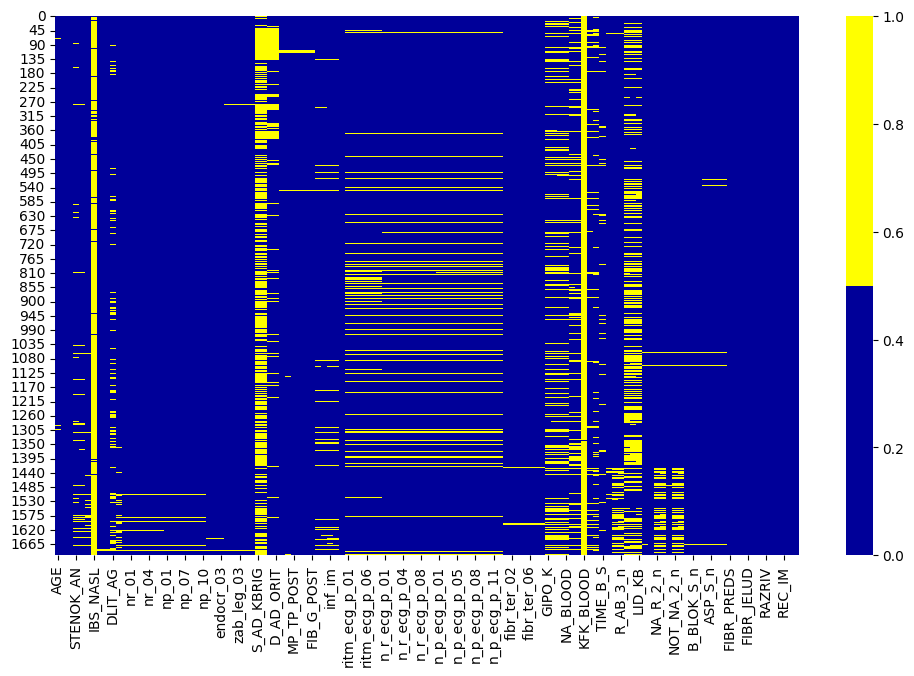

In [16]:
#heatmap for NA values
import seaborn as sns
plt.figure(figsize=(12,7))
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is missing.
sns.heatmap(data.isnull(),
            cmap = sns.color_palette(colours))
plt.show()

`Here we can see that some of the features having NA values in the Dataset`

In [17]:
# identify columns with missing values
cols_with_missing = data.columns[data.isnull().any()]
# display columns with missing values
print(cols_with_missing)

Index(['AGE', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL',
       'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A',
       ...
       'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n',
       'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n'],
      dtype='object', length=110)


In [18]:
# fill in missing values with mode for each column
for col in cols_with_missing:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)

In [19]:
#Checking for missing data
data.isna().sum()

AGE          0
SEX          0
INF_ANAM     0
STENOK_AN    0
FK_STENOK    0
            ..
DRESSLER     0
ZSN          0
REC_IM       0
P_IM_STEN    0
LET_IS       0
Length: 123, dtype: int64

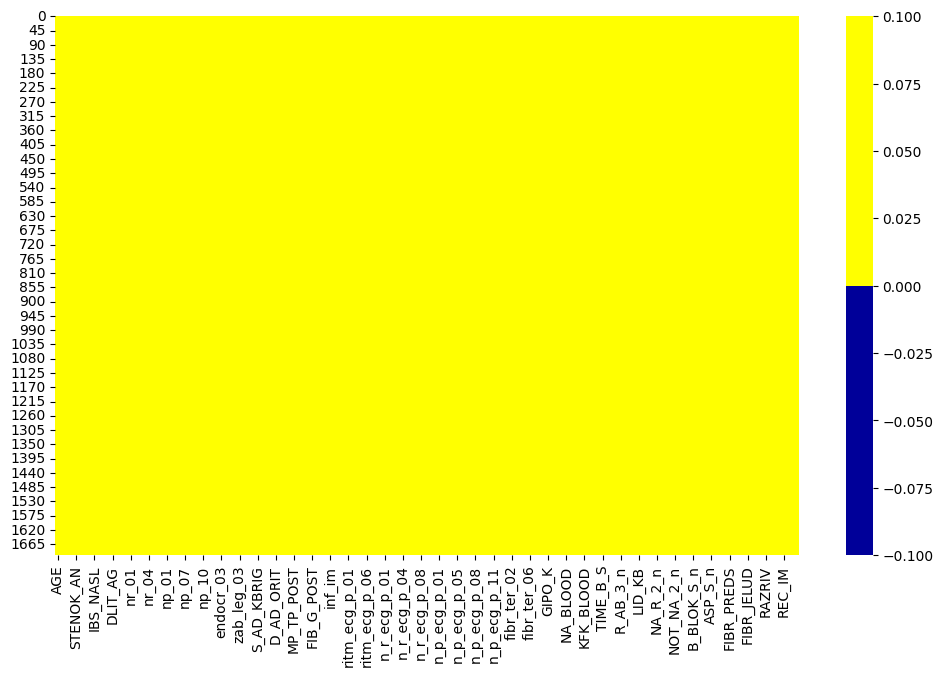

In [20]:
#heatmap for NA values
plt.figure(figsize=(12,7))
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is missing.
sns.heatmap(data.isnull(),
            cmap = sns.color_palette(colours))
plt.show()

`The Dataset has now no any nA values`

In [21]:
# save the DataFrame to a CSV file
data.to_csv('example.csv', index=False)

In [22]:
#checking for duplicate records
data[data.index.duplicated()]

Empty DataFrame
Columns: [AGE, SEX, INF_ANAM, STENOK_AN, FK_STENOK, IBS_POST, IBS_NASL, GB, SIM_GIPERT, DLIT_AG, ZSN_A, nr_11, nr_01, nr_02, nr_03, nr_04, nr_07, nr_08, np_01, np_04, np_05, np_07, np_08, np_09, np_10, endocr_01, endocr_02, endocr_03, zab_leg_01, zab_leg_02, zab_leg_03, zab_leg_04, zab_leg_06, S_AD_KBRIG, D_AD_KBRIG, S_AD_ORIT, D_AD_ORIT, O_L_POST, K_SH_POST, MP_TP_POST, SVT_POST, GT_POST, FIB_G_POST, ant_im, lat_im, inf_im, post_im, IM_PG_P, ritm_ecg_p_01, ritm_ecg_p_02, ritm_ecg_p_04, ritm_ecg_p_06, ritm_ecg_p_07, ritm_ecg_p_08, n_r_ecg_p_01, n_r_ecg_p_02, n_r_ecg_p_03, n_r_ecg_p_04, n_r_ecg_p_05, n_r_ecg_p_06, n_r_ecg_p_08, n_r_ecg_p_09, n_r_ecg_p_10, n_p_ecg_p_01, n_p_ecg_p_03, n_p_ecg_p_04, n_p_ecg_p_05, n_p_ecg_p_06, n_p_ecg_p_07, n_p_ecg_p_08, n_p_ecg_p_09, n_p_ecg_p_10, n_p_ecg_p_11, n_p_ecg_p_12, fibr_ter_01, fibr_ter_02, fibr_ter_03, fibr_ter_05, fibr_ter_06, fibr_ter_07, fibr_ter_08, GIPO_K, K_BLOOD, GIPER_NA, NA_BLOOD, ALT_BLOOD, AST_BLOOD, KFK_BLOOD, L_BLOOD, ROE, TIME_B_S, R_AB_1_n, R_AB_2_n, R_AB_3_n, NA_KB, NOT_NA_KB, LID_KB, NITR_S, NA_R_1_n, NA_R_2_n, ...]
Index: []

[0 rows x 123 columns]

`The Dataset has no any duplicate values`

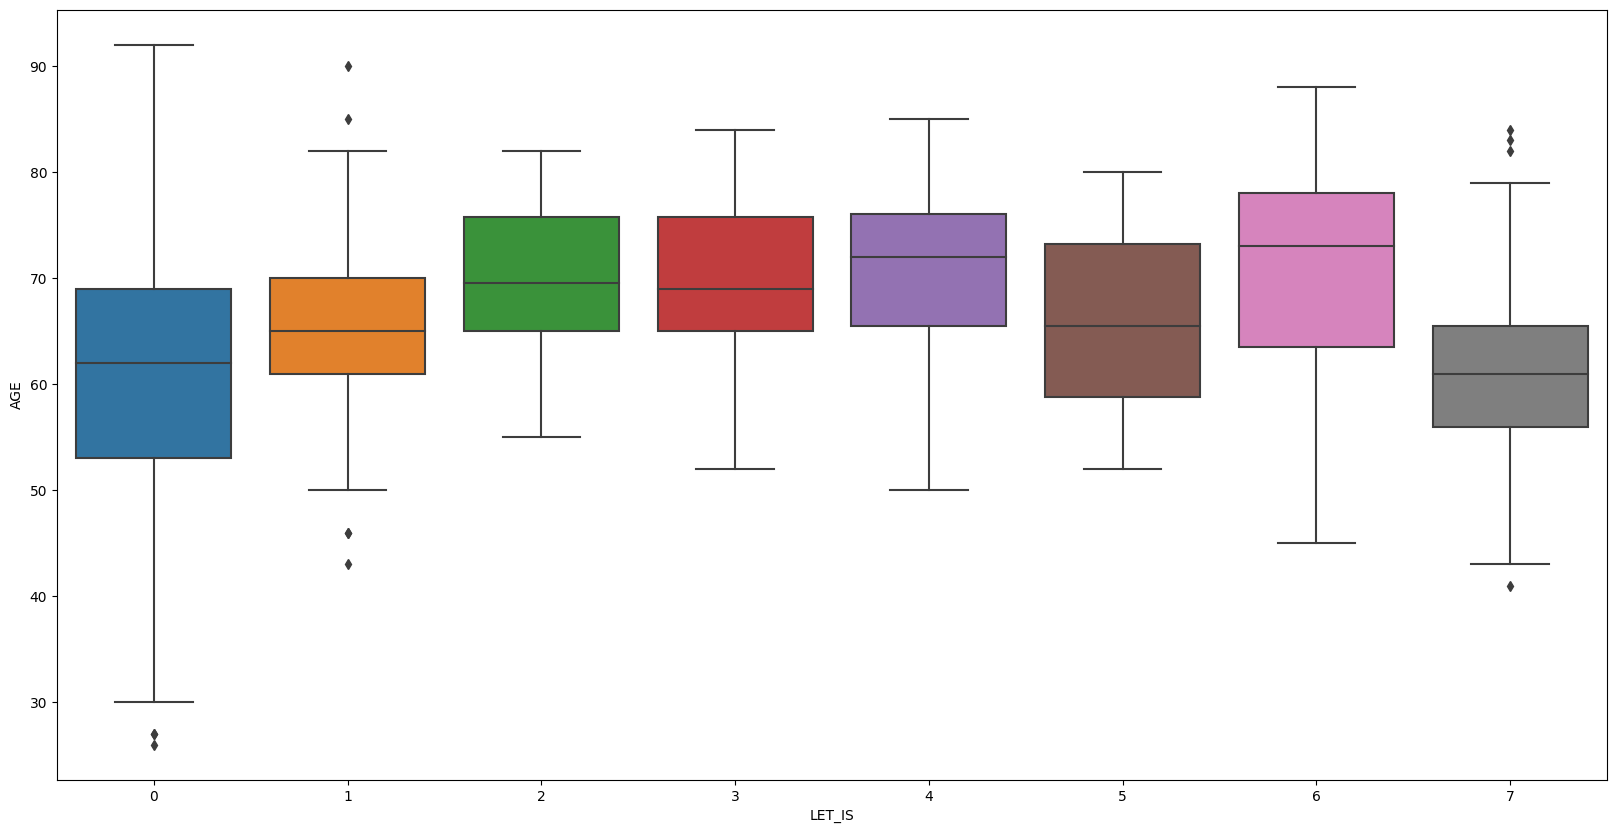

In [23]:
# AgeWise Lethal Outcome
plt.figure(figsize=(20,10))
sns.boxplot(x='LET_IS',y='AGE',data=data)
plt.show()

<h3> Observation:</h3>
As we can observe maximum Lethal Outcome cause is ranging between 50 to 80 age

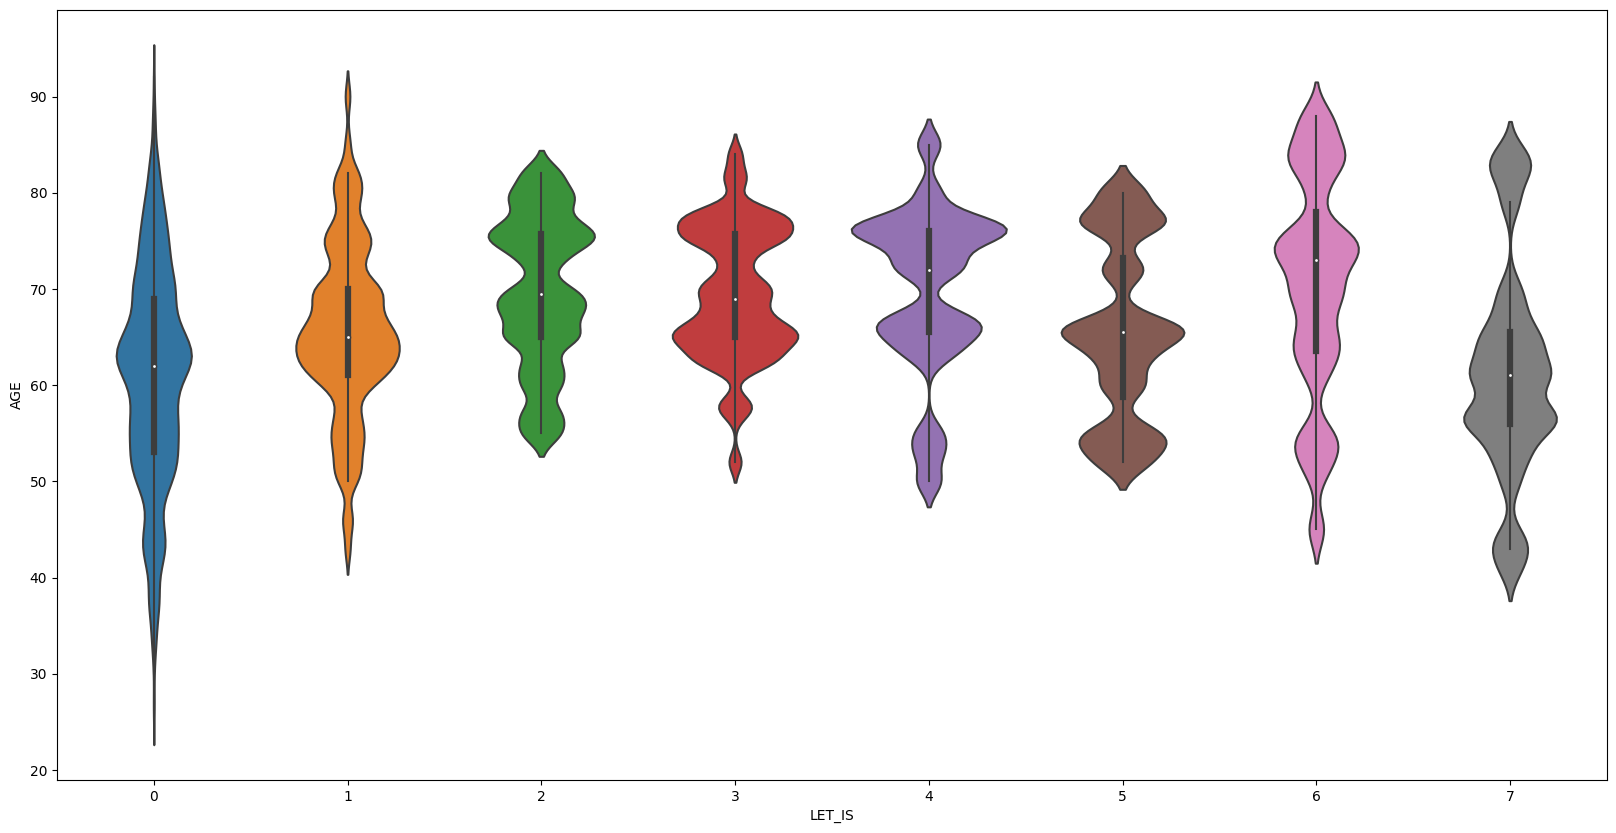

In [24]:
#violine plot
plt.figure(figsize=(20,10))
sns.violinplot(data= data
               
               , x='LET_IS',y='AGE',bw=.15)
plt.show()

<Figure size 2000x1000 with 0 Axes>

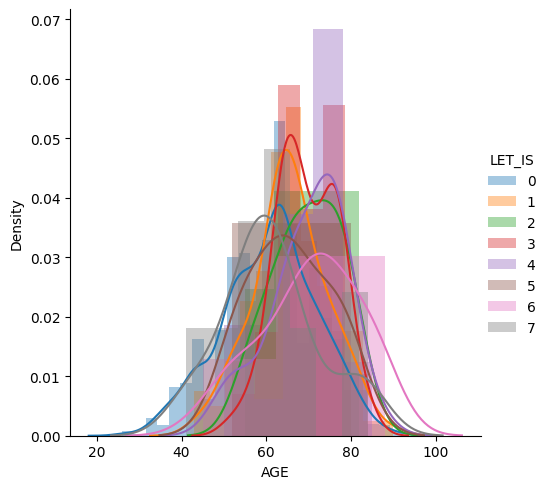

In [25]:
plt.figure(figsize=(20,10))
sns.FacetGrid(data,hue='LET_IS',height=5).map(sns.distplot,'AGE').add_legend()
plt.show()

<h3>Observation:</h3>
We can see that myocardial rupture has high peak and the age range is between 50 to 90

<Figure size 1000x1500 with 0 Axes>

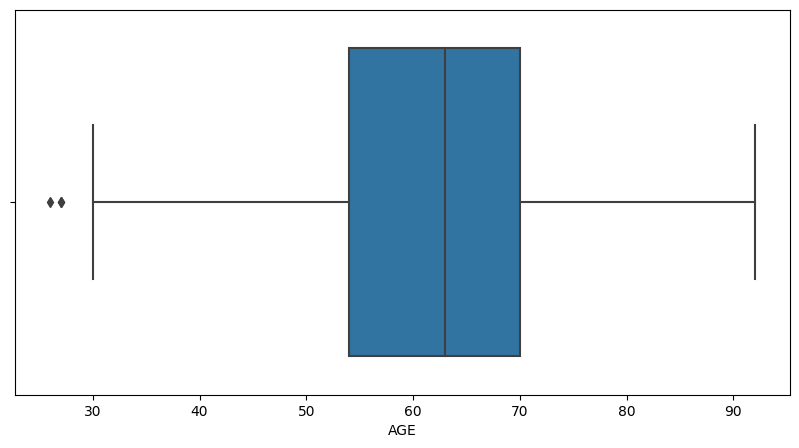

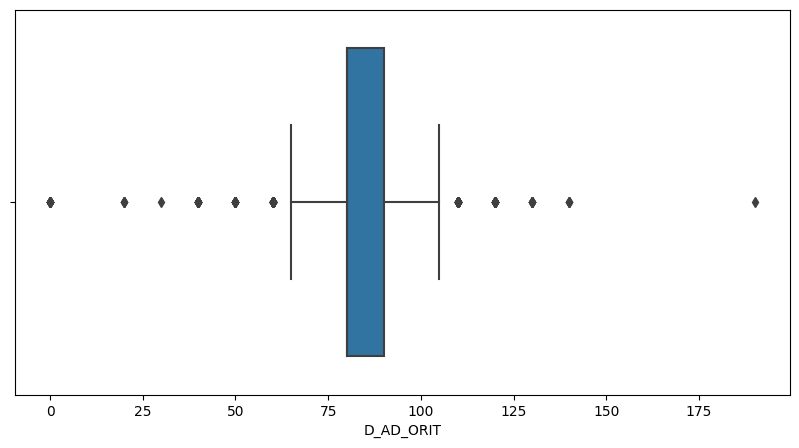

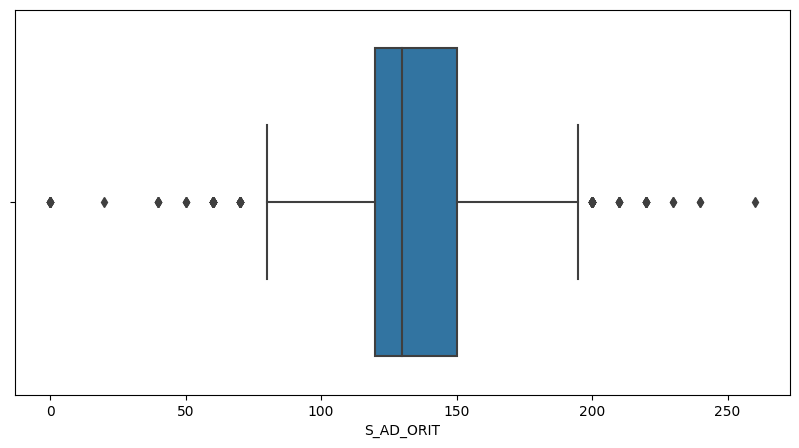

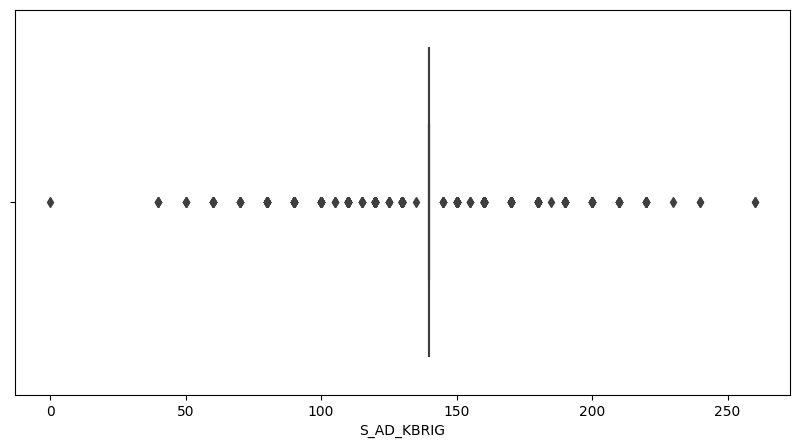

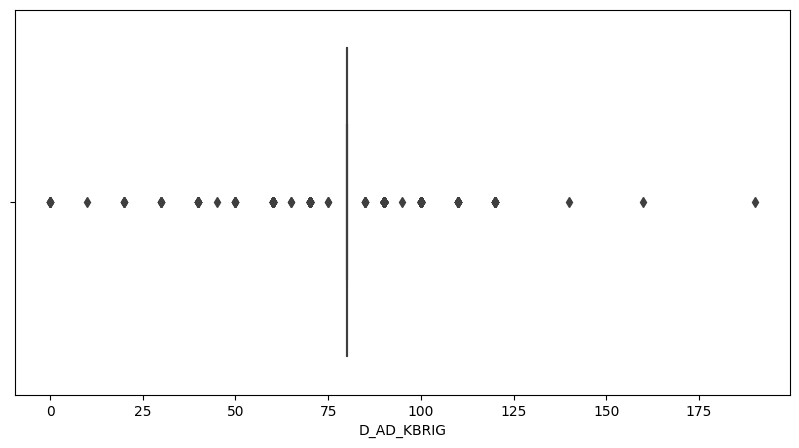

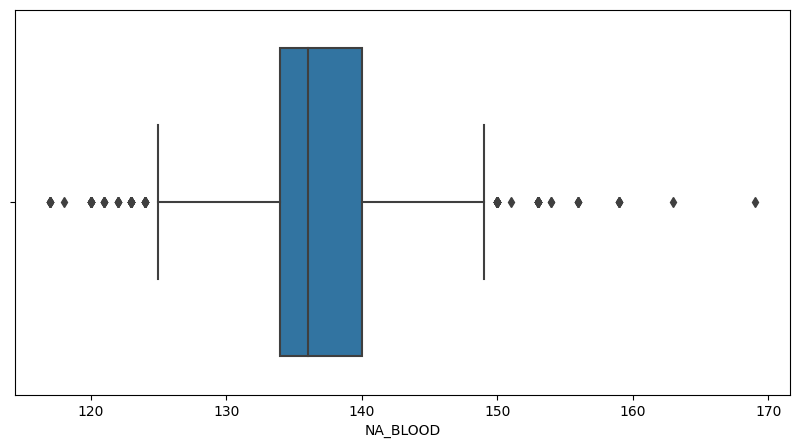

In [26]:
#outliers of continuous features

cols = ['AGE','D_AD_ORIT','S_AD_ORIT','S_AD_KBRIG','D_AD_KBRIG','NA_BLOOD']
plt.figure(figsize=(10,15))

i=1
for col in cols:
    plt.figure(figsize=(10,35))
    plt.subplot(6,1,i)
    sns.boxplot(x=col, data= data)
    i+=1
plt.show()

<h3>Observations:</h3>

We can see that S_AD_KBRIG has the highest mean whereas the AGE as the lowest mean <br>

### Deal with outliers in the dataframe using Winsorization
Winsorized mean is a method of averaging that initially replaces the smallest and largest values with the observations closest to them. This is done to limit the effect of outliers or abnormal extreme values, or outliers, on the calculation. For example, a 90% winsorization would see all data below the 5th percentile set to the 5th percentile, and data above the 95th percentile set to the 95th percentile.

In [27]:
#define the percentile limits for winsorization

cols = ['AGE','D_AD_ORIT','S_AD_ORIT','S_AD_KBRIG','D_AD_KBRIG','NA_BLOOD']
pct_lower = 0.01
pct_upper = 0.95

for i in cols:
    data[i] = np.clip(data[i],
                data[i].quantile(pct_lower),
                data[i].quantile(pct_upper))

<Figure size 1000x1500 with 0 Axes>

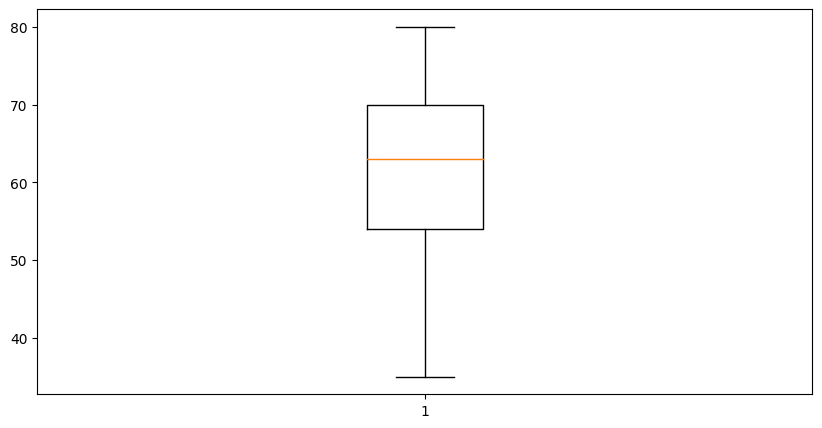

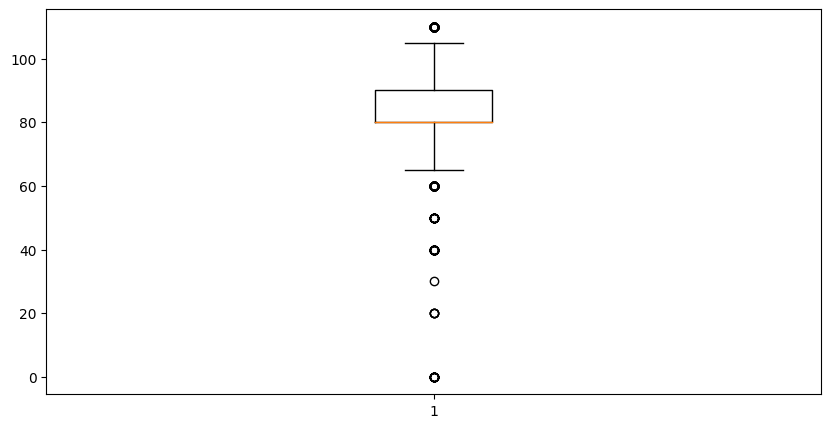

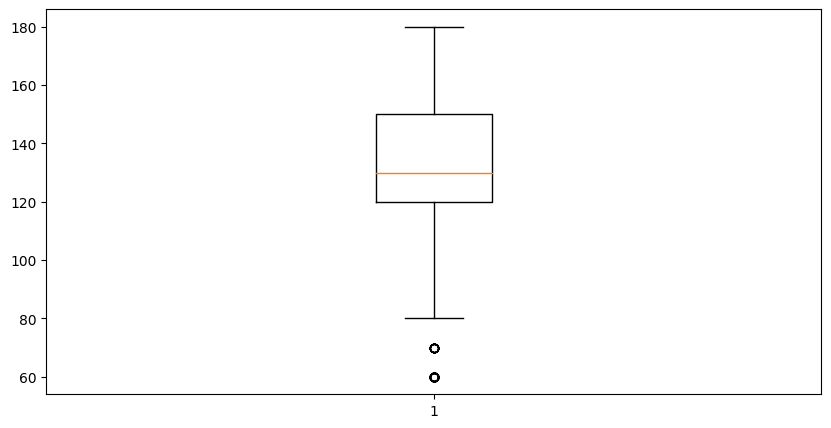

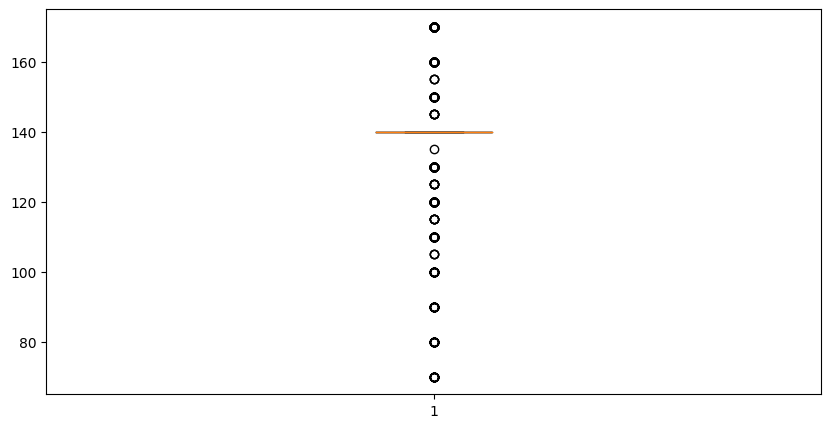

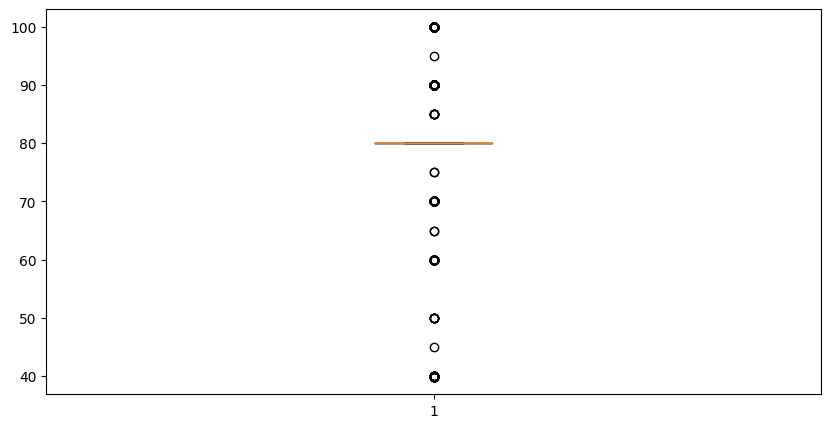

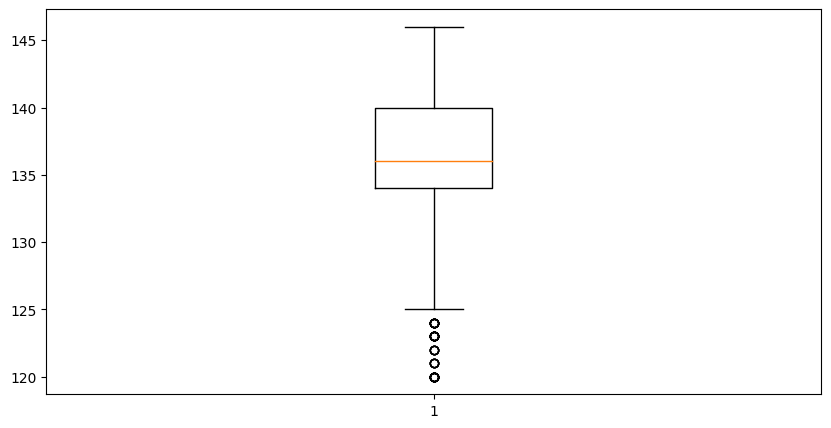

In [28]:
#outliers of continuous features

cols = ['AGE','D_AD_ORIT','S_AD_ORIT','S_AD_KBRIG','D_AD_KBRIG','NA_BLOOD']
plt.figure(figsize=(10,15))

i=1
for col in cols:
    plt.figure(figsize=(10,35))
    plt.subplot(6,1,i)
    plt.boxplot(x=col, data= data)
    i+=1
plt.show()

<h3>Observations:</h3>

After applying Winsorization method on the features we can see that the outliers in the Age,S_AD_ORIT and NA_BLOOD has been
replace the smallest and largest values with the observations closest to them<br>

<Figure size 1000x1500 with 0 Axes>

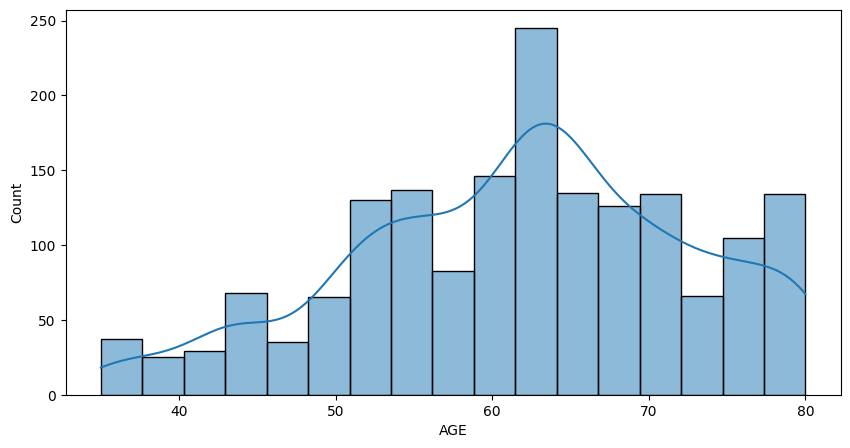

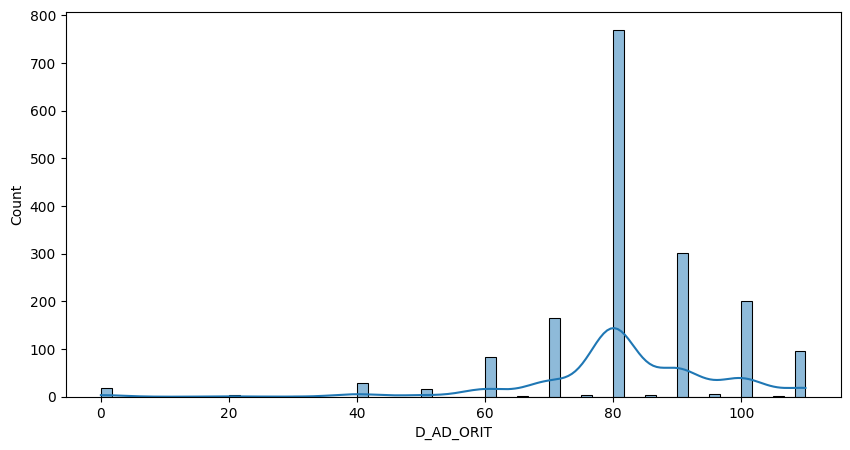

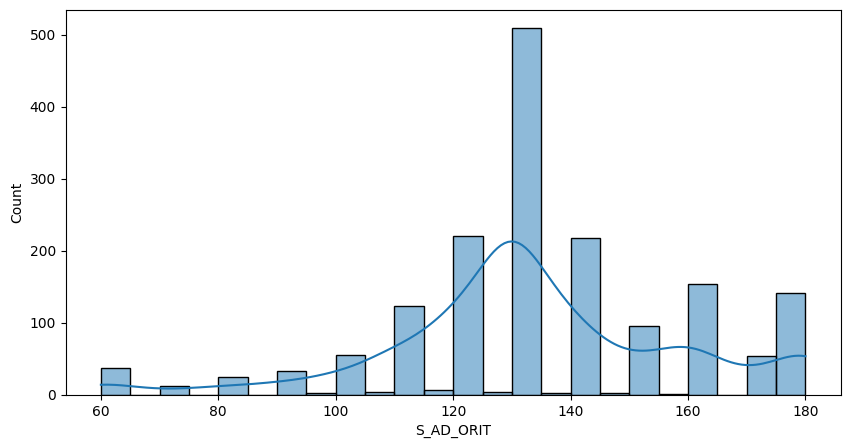

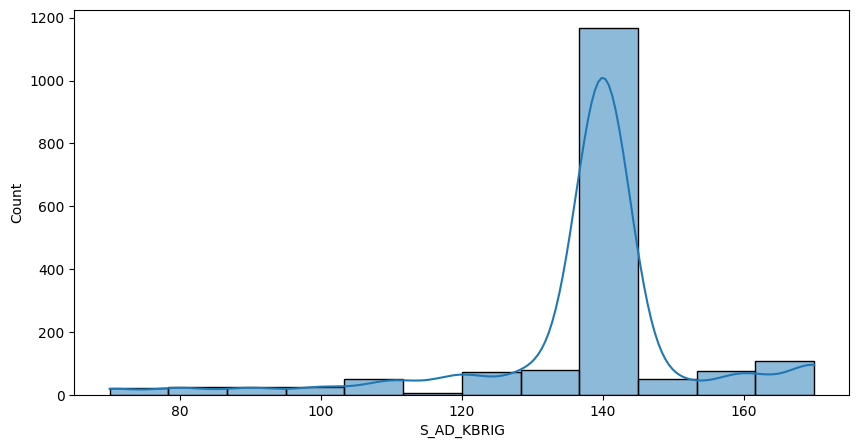

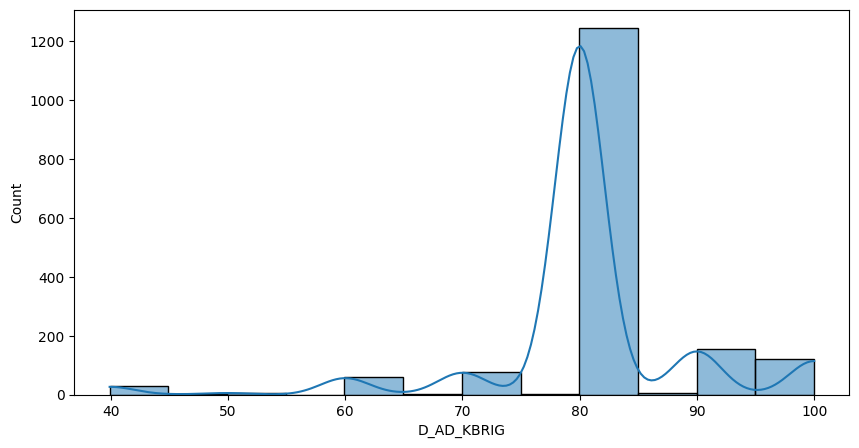

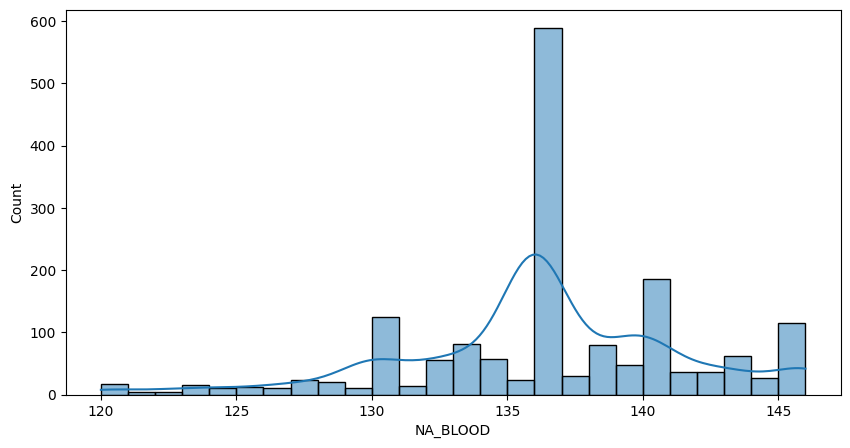

In [29]:
#histplot of continuous features

cols = ['AGE','D_AD_ORIT','S_AD_ORIT','S_AD_KBRIG','D_AD_KBRIG','NA_BLOOD']
plt.figure(figsize=(10,15))

i=1
for col in cols:
    plt.figure(figsize=(10,35))
    plt.subplot(6,1,i)
    sns.histplot(x=col, data= data,kde=True)
    i+=1
plt.show()

<h3>Observations:</h3>

The features like Age,Diastolic blood pressure,Systolic blood pressure,Systolic blood pressure according to Emergency Cardiology and Serum sodium content are <b>Normally Distributed<b>.<br>

In [30]:
#dependent variable
data['LET_IS'].value_counts()

0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: LET_IS, dtype: int64

In [31]:
#displaying data by pie chart
fig = plt.figure(figsize = (15, 8))
fig = px.pie(data['LET_IS'],names='LET_IS',title='Lethal outcome (cause)')
fig.show()

<Figure size 1500x800 with 0 Axes>

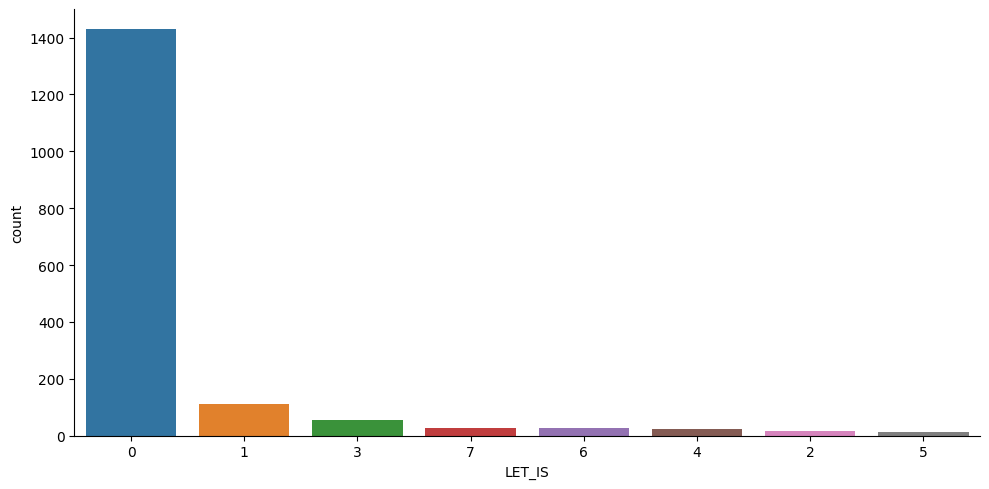

In [32]:
# Create catplot chart
sns.catplot(x='LET_IS', kind="count", aspect = 2, data=data, order = data['LET_IS'].value_counts().index)

<h3>Observations:</h3>

We can see that the highest lethal outcome is of unknown (alive).<br>
While the lowest is of thromboembolism 12 <br>

In [33]:
data['SEX'].value_counts()

1    1065
0     635
Name: SEX, dtype: int64

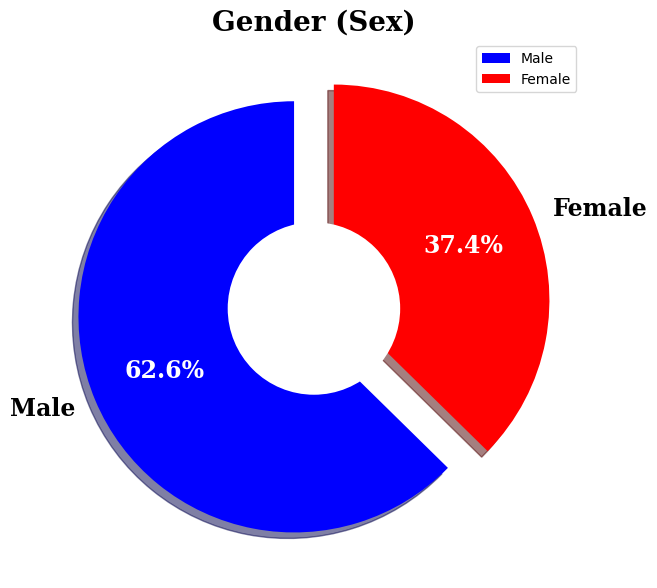

In [34]:
label_data= data['SEX'].value_counts()
labels_name = ['Male','Female']
explode=(0.1,0.1)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data, labels= labels_name, colors=['blue','red'], pctdistance=0.65,shadow=True,
                             startangle=90, explode=explode, autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('Gender (Sex)',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Male','Female'],loc="upper right")
plt.show()

<h3>Observations:</h3>

In the dataset more number of percentage is of Males compared to Female

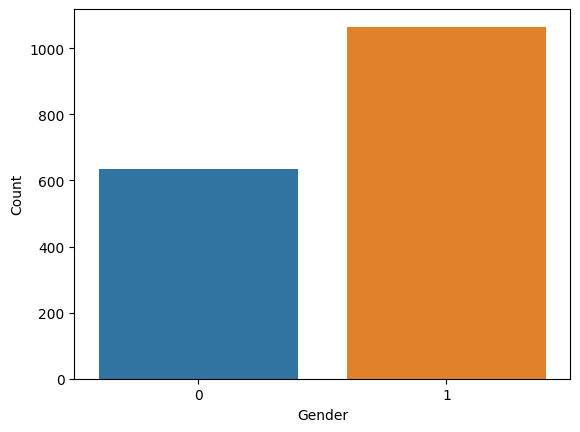

In [35]:
#displaying gender 
sns.countplot(x="SEX", data=data)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

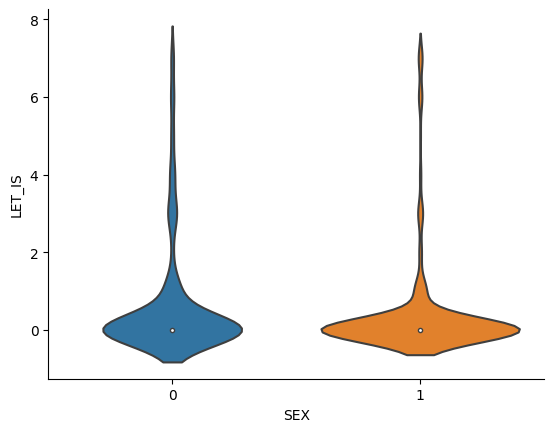

In [36]:
#Violin Plot
sns.violinplot(data = data , x= 'SEX', y= 'LET_IS') #Variable Plot
sns.despine()

[]

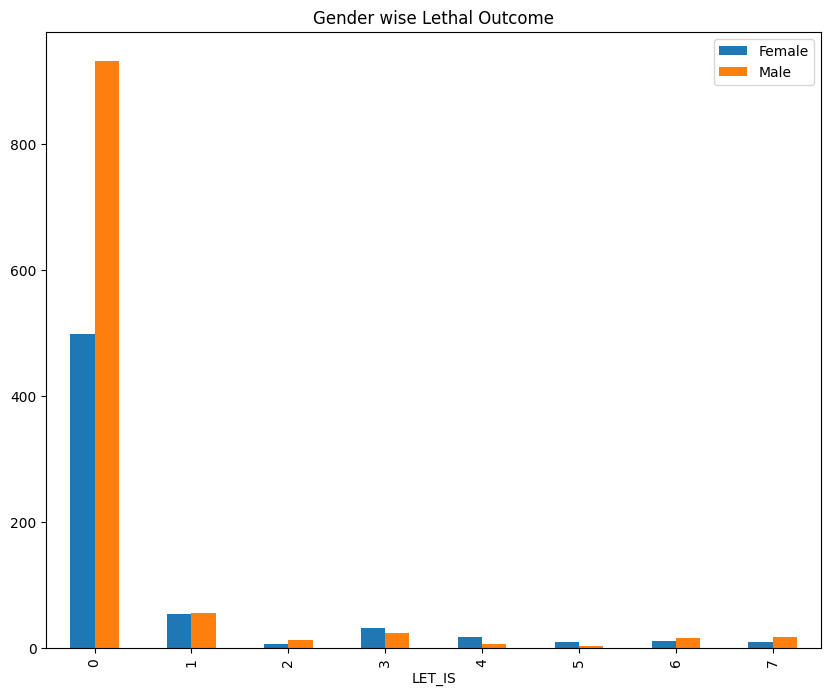

In [37]:
pd.crosstab(data['LET_IS'], data['SEX']).plot(kind="bar", figsize=(10, 8), title="Gender wise Lethal Outcome")
plt.legend(['Female','Male'],loc="upper right")
plt.plot()

<h3>Observations:</h3>

We can see that the highest lethal outcome is of unknown (alive) is in the Male while less in Female.<br>
The cardiogenic shock is equally the same in both the Gender. <br>
The pulmonary edema is more in male than the females <br>
The myocardial rupture is more in female than the male <br>
The progress of congestive heart failure and thromboembolism is also more in female than male<br>
And the asystole and ventricular fibrillation is little more in male as comapared to female.

[]

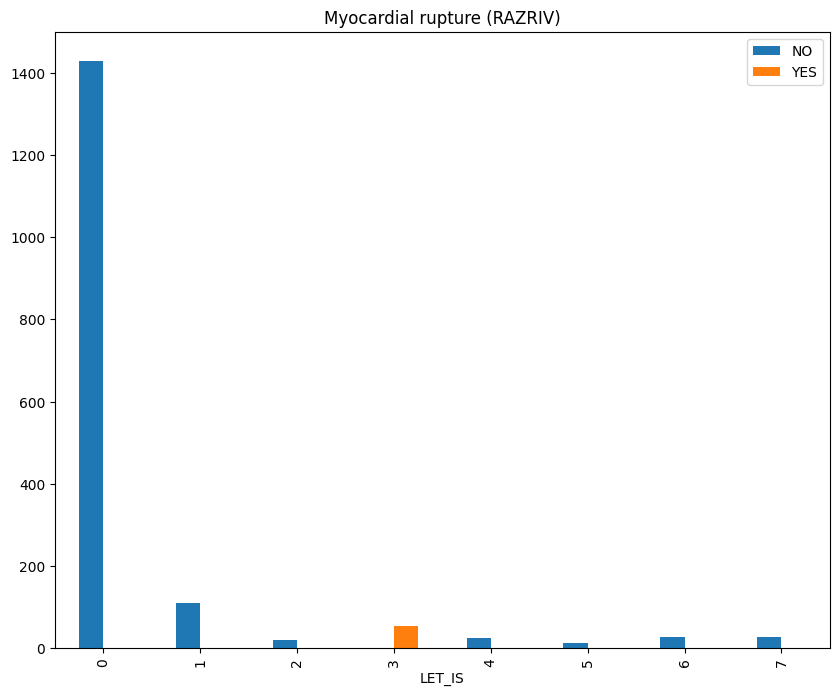

In [38]:
pd.crosstab(data['LET_IS'], data['RAZRIV']).plot(kind="bar", figsize=(10, 8), 
                                                   title="Myocardial rupture (RAZRIV)")
plt.legend(['NO','YES'],loc="upper right")
plt.plot()

<h3>Observations:</h3>

We can see that RAZRIV on the Lethal outcome as for the other categories it is giving NO means the chances of myocardial rupture are less.<br>
While in the 3rd category which is myocardial rupture itself it is showing positive realtion. <br>

### Feature Engineering 

In [39]:
X = data.drop('LET_IS', axis=1)
Y = data[['LET_IS']]

### Univariate Feature Selection

In [40]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, Y)

In [41]:
X

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0     77.0    1       2.0        1.0        1.0       2.0       0.0  3.0   
1     55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2     52.0    1       0.0        0.0        0.0       2.0       0.0  2.0   
3     68.0    0       0.0        0.0        0.0       2.0       0.0  2.0   
4     60.0    1       0.0        0.0        0.0       2.0       0.0  3.0   
...    ...  ...       ...        ...        ...       ...       ...  ...   
1695  77.0    0       0.0        4.0        2.0       1.0       0.0  2.0   
1696  70.0    0       0.0        6.0        2.0       1.0       0.0  2.0   
1697  55.0    1       3.0        6.0        2.0       2.0       0.0  0.0   
1698  79.0    0       2.0        2.0        2.0       1.0       0.0  2.0   
1699  63.0    1       2.0        0.0        2.0       2.0       0.0  2.0   

      SIM_GIPERT  DLIT_AG  ...  PREDS_TAH  JELUD_TAH  FIBR_JELUD  A_V_BLOK  \
0            0.0      7.0  ...          0          0           0         0   
1            0.0      0.0  ...          0          0           0         0   
2            0.0      2.0  ...          0          0           0         0   
3            0.0      3.0  ...          0          0           0         0   
4            0.0      7.0  ...          0          0           0         0   
...          ...      ...  ...        ...        ...         ...       ...   
1695         0.0      7.0  ...          0          0           0         1   
1696         0.0      7.0  ...          0          0           0         0   
1697         0.0      0.0  ...          0          0           0         0   
1698         0.0      7.0  ...          0          0           0         0   
1699         0.0      0.0  ...          0          0           0         0   

      OTEK_LANC  RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  
0             0       0         0    0       0          0  
1             0       0         0    0       0          0  
2             0       0         0    0       0          0  
3             0       0         0    1       0          0  
4             0       0         0    0       0          0  
...         ...     ...       ...  ...     ...        ...  
1695          0       1         0    0       0          0  
1696          0       0         0    0       0          0  
1697          0       0         0    0       1          0  
1698          1       0         0    0       0          0  
1699          0       0         0    0       0          0  

[1700 rows x 122 columns]

In [42]:
Y

LET_IS
0          0
1          0
2          0
3          0
4          0
...      ...
1695       3
1696       1
1697       6
1698       1
1699       1

[1700 rows x 1 columns]

In [43]:
# summarize scores
scores = fit.scores_
features = fit.transform(X)    

In [44]:
score_df = pd.DataFrame(list(zip(scores, X)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True,ignore_index=True)
score_df.head(10)

Score       Feature
0  0.137466        RAZRIV
1  0.065095     S_AD_ORIT
2  0.063334     P_IM_STEN
3  0.061906     endocr_02
4  0.061545     K_SH_POST
5  0.058043     D_AD_ORIT
6  0.050336    S_AD_KBRIG
7  0.047046        LID_KB
8  0.042943  n_p_ecg_p_04
9  0.038610       L_BLOOD

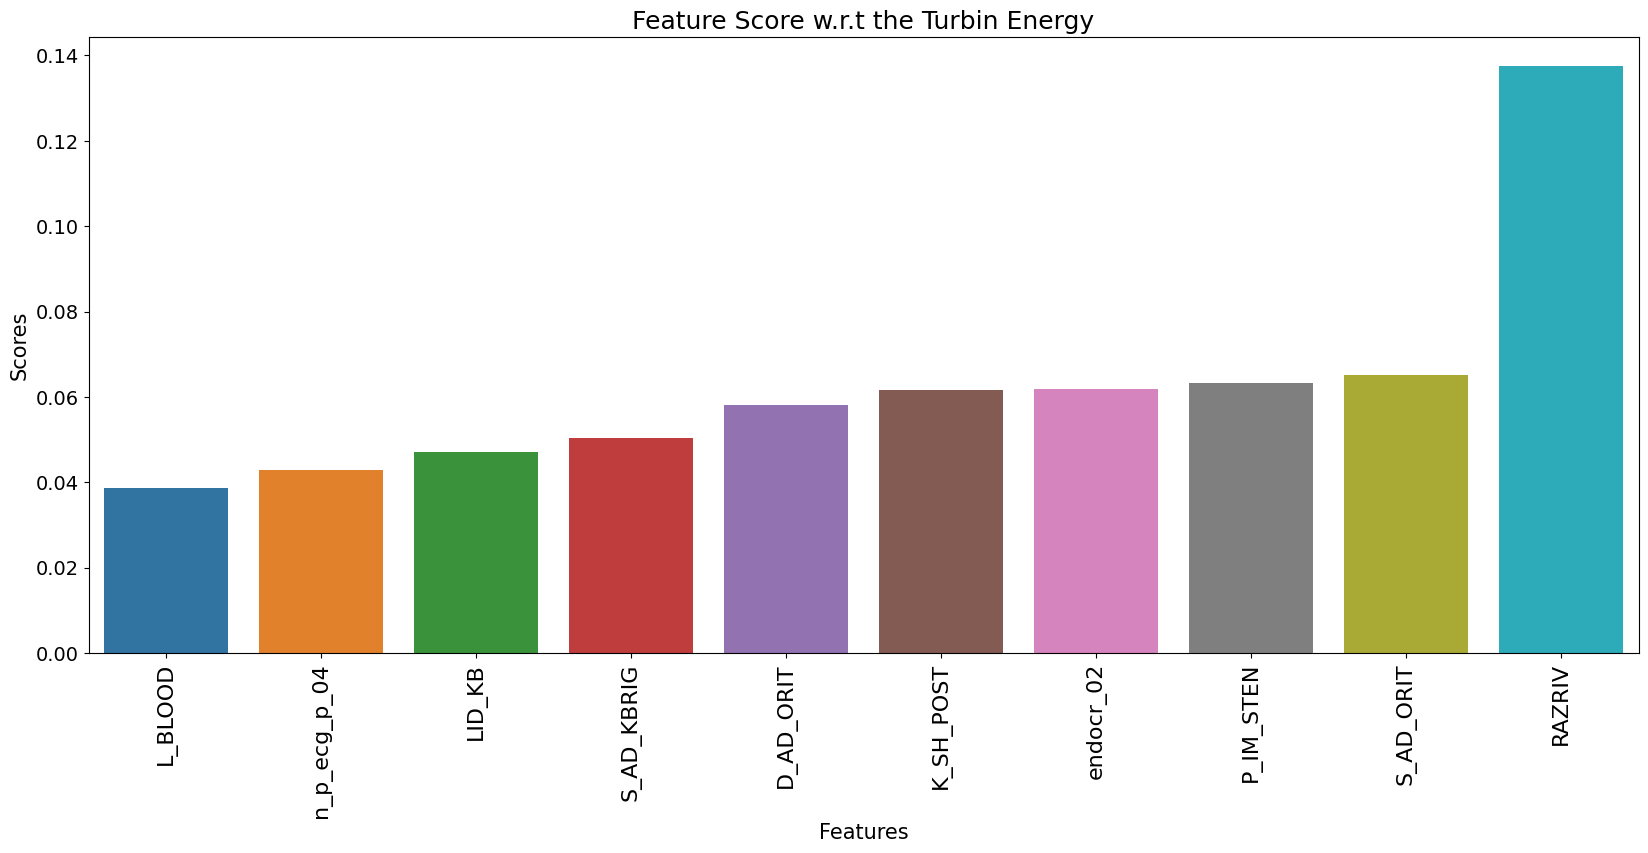

In [45]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df.head(10), 
            order=score_df.head(10).sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Turbin Energy", size=18)
plt.show()

In [46]:
print(score_df['Feature'][:10])

0          RAZRIV
1       S_AD_ORIT
2       P_IM_STEN
3       endocr_02
4       K_SH_POST
5       D_AD_ORIT
6      S_AD_KBRIG
7          LID_KB
8    n_p_ecg_p_04
9         L_BLOOD
Name: Feature, dtype: object


### Recursive Feature Elimination

In [47]:
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=15)
fit = rfe.fit(X, Y)

In [48]:
# Feature Ranking:
feature_rankings = fit.ranking_
feature_rankings

array([ 84,   1,  51,  72,  69,  41,  53,  77,  45,  81,   8,   7,  21,
        47,  19,  29, 108,  99,  83,  94,  37, 106,  67, 105,  92,   9,
        23,  64,  22,   2,  12,  95,  62,  93,  91,  88,  87,  32,   1,
        25,   5,  86,  34,  70,  43,  71,  42,   1,  49,   1,  76, 102,
        65,  36,  40,  54,  11,  14,   6,  46,  79, 104, 101, 100,   3,
        30, 107,  33,  38,  74,  78,  60,  59,   1,  90,  89,  68,  66,
        97, 103,  98,  31,  20,  56,  85,  35,   1,  63,  82,  96,  80,
        75,  44,   4,  27,   1,  16,   1,  61,  55,  58,  73,  24,  17,
        50,  13,  28,  26,   1,  10,  48,  52,  18,  15,   1,  57,   1,
         1,  39,   1,   1,   1])

In [49]:
# sort the rankings in descending order
sorted_rankings = sorted(range(len(feature_rankings)), key=lambda k: feature_rankings[k], reverse=True)

# select the top 10 features based on their ranking
top_10_features = sorted_rankings[:10]

# print the top 10 features
print(top_10_features)

[16, 66, 21, 23, 61, 79, 51, 62, 63, 17]


In [50]:
# get the top 10 feature names
feature_names = X.columns[top_10_features]
# printing the top 10 feature names
print(feature_names)

Index(['nr_07', 'n_p_ecg_p_05', 'np_07', 'np_09', 'n_r_ecg_p_09',
       'fibr_ter_07', 'ritm_ecg_p_06', 'n_r_ecg_p_10', 'n_p_ecg_p_01',
       'nr_08'],
      dtype='object')


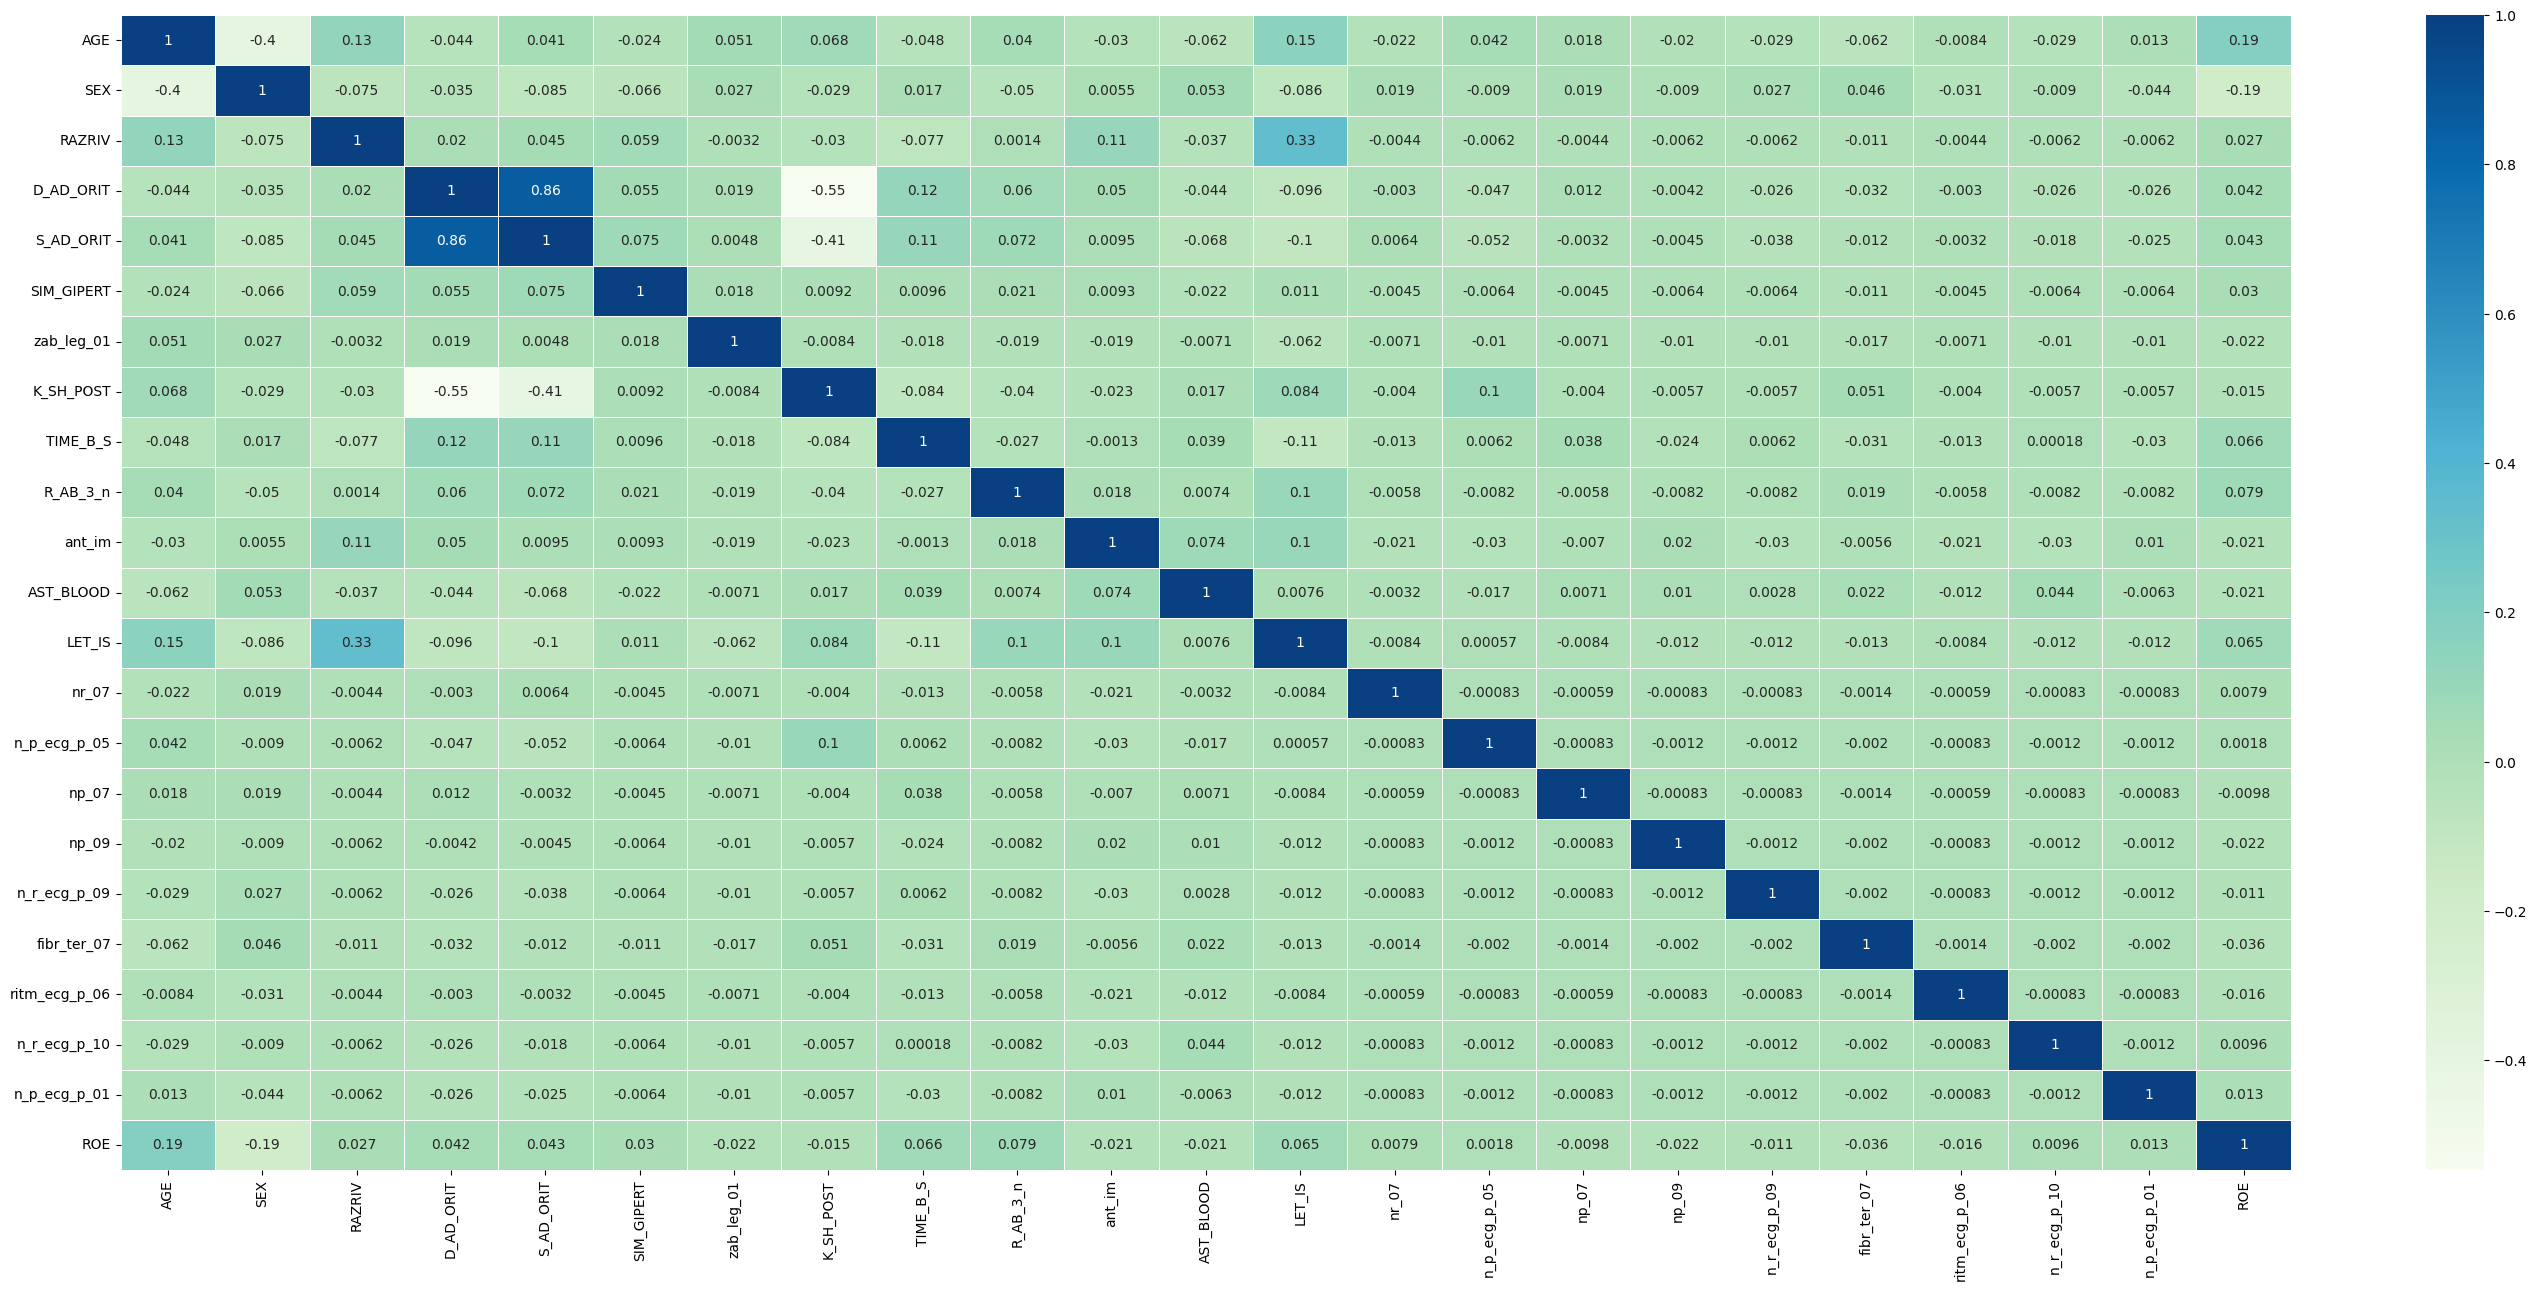

In [51]:
# Checking correlation of features selected by RFE with target column also checking impact of different features on target.

plt.figure(figsize = (35,15))
sns.heatmap(data[['AGE','SEX','RAZRIV','D_AD_ORIT','S_AD_ORIT','SIM_GIPERT','zab_leg_01','K_SH_POST','TIME_B_S',
                  'R_AB_3_n','ant_im','AST_BLOOD','LET_IS','nr_07', 'n_p_ecg_p_05', 'np_07', 'np_09', 'n_r_ecg_p_09',
                  'fibr_ter_07', 'ritm_ecg_p_06', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'ROE']].corr(), cmap='GnBu', annot=True,linewidth=.5)
plt.show()

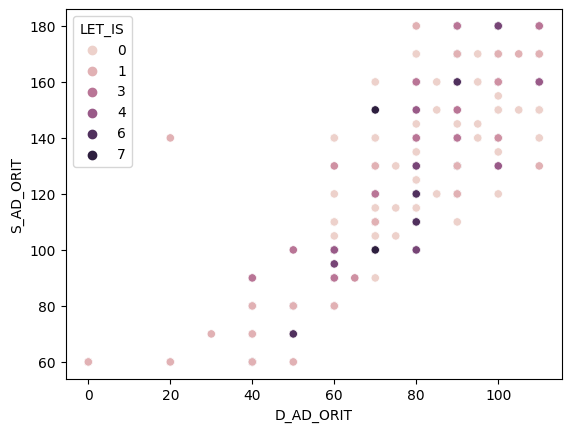

In [52]:
sns.scatterplot(x='D_AD_ORIT',y='S_AD_ORIT',data = data,hue='LET_IS')
plt.show()

In [53]:
dep_cor = data.corr()[['LET_IS']].T.style.background_gradient('copper_r')
dep_cor

In [54]:
#coping the original dataset for further evalution as it wont effect our original data
df=data.copy()

In [55]:
df

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0     77.0    1       2.0        1.0        1.0       2.0       0.0  3.0   
1     55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2     52.0    1       0.0        0.0        0.0       2.0       0.0  2.0   
3     68.0    0       0.0        0.0        0.0       2.0       0.0  2.0   
4     60.0    1       0.0        0.0        0.0       2.0       0.0  3.0   
...    ...  ...       ...        ...        ...       ...       ...  ...   
1695  77.0    0       0.0        4.0        2.0       1.0       0.0  2.0   
1696  70.0    0       0.0        6.0        2.0       1.0       0.0  2.0   
1697  55.0    1       3.0        6.0        2.0       2.0       0.0  0.0   
1698  79.0    0       2.0        2.0        2.0       1.0       0.0  2.0   
1699  63.0    1       2.0        0.0        2.0       2.0       0.0  2.0   

      SIM_GIPERT  DLIT_AG  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0            0.0      7.0  ...          0           0         0          0   
1            0.0      0.0  ...          0           0         0          0   
2            0.0      2.0  ...          0           0         0          0   
3            0.0      3.0  ...          0           0         0          0   
4            0.0      7.0  ...          0           0         0          0   
...          ...      ...  ...        ...         ...       ...        ...   
1695         0.0      7.0  ...          0           0         1          0   
1696         0.0      7.0  ...          0           0         0          0   
1697         0.0      0.0  ...          0           0         0          0   
1698         0.0      7.0  ...          0           0         0          1   
1699         0.0      0.0  ...          0           0         0          0   

      RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0          0         0    0       0          0       0  
1          0         0    0       0          0       0  
2          0         0    0       0          0       0  
3          0         0    1       0          0       0  
4          0         0    0       0          0       0  
...      ...       ...  ...     ...        ...     ...  
1695       1         0    0       0          0       3  
1696       0         0    0       0          0       1  
1697       0         0    0       1          0       6  
1698       0         0    0       0          0       1  
1699       0         0    0       0          0       1  

[1700 rows x 123 columns]

In [56]:
new_df = df[['AGE','SEX','RAZRIV','D_AD_ORIT','S_AD_ORIT','SIM_GIPERT','ROE','K_SH_POST','TIME_B_S',
             'R_AB_3_n','ant_im','AST_BLOOD','IBS_POST','nr_07','LET_IS']]
new_df

AGE  SEX  RAZRIV  D_AD_ORIT  S_AD_ORIT  SIM_GIPERT   ROE  K_SH_POST  \
0     77.0    1       0      100.0      180.0         0.0  16.0        0.0   
1     55.0    1       0       90.0      120.0         0.0   3.0        0.0   
2     52.0    1       0      100.0      180.0         0.0   5.0        0.0   
3     68.0    0       0       70.0      120.0         0.0   5.0        0.0   
4     60.0    1       0       90.0      160.0         0.0   5.0        0.0   
...    ...  ...     ...        ...        ...         ...   ...        ...   
1695  77.0    0       1       70.0      110.0         0.0   6.0        0.0   
1696  70.0    0       0        0.0       60.0         0.0   5.0        1.0   
1697  55.0    1       0       50.0       70.0         0.0  13.0        0.0   
1698  79.0    0       0       70.0      110.0         0.0   4.0        0.0   
1699  63.0    1       0        0.0       60.0         0.0   5.0        1.0   

      TIME_B_S  R_AB_3_n  ant_im  AST_BLOOD  IBS_POST  nr_07  LET_IS  
0          4.0       1.0     1.0       0.15       2.0    0.0       0  
1          2.0       0.0     4.0       0.18       0.0    0.0       0  
2          3.0       0.0     4.0       0.11       2.0    0.0       0  
3          2.0       1.0     0.0       0.37       2.0    0.0       0  
4          9.0       0.0     4.0       0.22       2.0    0.0       0  
...        ...       ...     ...        ...       ...    ...     ...  
1695       2.0       0.0     0.0       0.52       1.0    0.0       3  
1696       2.0       0.0     0.0       0.15       1.0    0.0       1  
1697       1.0       0.0     4.0       0.15       2.0    0.0       6  
1698       2.0       0.0     0.0       0.45       1.0    0.0       1  
1699       1.0       0.0     0.0       0.15       2.0    0.0       1  

[1700 rows x 15 columns]

In [57]:
new = new_df [['AGE','SEX','RAZRIV','D_AD_ORIT','S_AD_ORIT','SIM_GIPERT','ROE','K_SH_POST','TIME_B_S',
             'R_AB_3_n','ant_im','AST_BLOOD','IBS_POST','nr_07']]
new

AGE  SEX  RAZRIV  D_AD_ORIT  S_AD_ORIT  SIM_GIPERT   ROE  K_SH_POST  \
0     77.0    1       0      100.0      180.0         0.0  16.0        0.0   
1     55.0    1       0       90.0      120.0         0.0   3.0        0.0   
2     52.0    1       0      100.0      180.0         0.0   5.0        0.0   
3     68.0    0       0       70.0      120.0         0.0   5.0        0.0   
4     60.0    1       0       90.0      160.0         0.0   5.0        0.0   
...    ...  ...     ...        ...        ...         ...   ...        ...   
1695  77.0    0       1       70.0      110.0         0.0   6.0        0.0   
1696  70.0    0       0        0.0       60.0         0.0   5.0        1.0   
1697  55.0    1       0       50.0       70.0         0.0  13.0        0.0   
1698  79.0    0       0       70.0      110.0         0.0   4.0        0.0   
1699  63.0    1       0        0.0       60.0         0.0   5.0        1.0   

      TIME_B_S  R_AB_3_n  ant_im  AST_BLOOD  IBS_POST  nr_07  
0          4.0       1.0     1.0       0.15       2.0    0.0  
1          2.0       0.0     4.0       0.18       0.0    0.0  
2          3.0       0.0     4.0       0.11       2.0    0.0  
3          2.0       1.0     0.0       0.37       2.0    0.0  
4          9.0       0.0     4.0       0.22       2.0    0.0  
...        ...       ...     ...        ...       ...    ...  
1695       2.0       0.0     0.0       0.52       1.0    0.0  
1696       2.0       0.0     0.0       0.15       1.0    0.0  
1697       1.0       0.0     4.0       0.15       2.0    0.0  
1698       2.0       0.0     0.0       0.45       1.0    0.0  
1699       1.0       0.0     0.0       0.15       2.0    0.0  

[1700 rows x 14 columns]

In [58]:
new.to_csv('data.csv')

In [57]:
x=new_df.drop(['LET_IS'],axis=1)
y=new_df['LET_IS']

In [58]:
# Standardization
a = StandardScaler()
a.fit(x)
x = a.transform(x)

In [59]:
x

array([[ 1.4060688 ,  0.77216846, -0.18112649, ..., -0.50111631,
         1.01519546, -0.0242607 ],
       [-0.62071657,  0.77216846, -0.18112649, ..., -0.34228881,
        -1.47878182, -0.0242607 ],
       [-0.89709639,  0.77216846, -0.18112649, ..., -0.71288629,
         1.01519546, -0.0242607 ],
       ...,
       [-0.62071657,  0.77216846, -0.18112649, ..., -0.50111631,
         1.01519546, -0.0242607 ],
       [ 1.59032202, -1.29505419, -0.18112649, ...,  1.0871586 ,
        -0.23179318, -0.0242607 ],
       [ 0.11629629,  0.77216846, -0.18112649, ..., -0.50111631,
         1.01519546, -0.0242607 ]])

In [60]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1695    3
1696    1
1697    6
1698    1
1699    1
Name: LET_IS, Length: 1700, dtype: int64

In [61]:
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)

In [62]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=50, stratify=Y)

In [63]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1190, 14), (1190,), (510, 14), (510,))

In [64]:
y_train.value_counts()

0    1000
1      77
3      38
6      19
7      19
4      16
2      13
5       8
Name: LET_IS, dtype: int64

In [65]:
y.value_counts()

0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: LET_IS, dtype: int64

In [66]:
# # SMOTE-TOMEK Technique
# counter = Counter(y)
# print('Before',counter)
# # Oversampling the train dataset using SMOTE + Tomek
# smtomek = SMOTE(random_state=0)
# x_train_smtomek, y_train_smtomek = smtomek.fit_resample(x, y)

# counter = Counter(y_train_smtomek)
# print('After',counter)

In [67]:
# X_train,X_test,y_train,y_test = train_test_split(x_train_smtomek,y_train_smtomek,test_size=0.3,
#                                                  random_state=0, stratify=y_train_smtomek)

In [68]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [69]:
# from sklearn.utils import resample

# # Assume that X_train and y_train contain the training data and labels, respectively

# # Determine the smallest class size
# class_sizes = [sum(y_train == i) for i in range(8)]
# min_class_size = min(class_sizes)

# # Up-sample each class to match the size of the smallest class
# X_upsampled = X_train.copy()
# y_upsampled = y_train.copy()
# for i in range(8):
#     if class_sizes[i] < min_class_size:
#         X_class = X_train[y_train == i]
#         y_class = y_train[y_train == i]
#         X_class_upsampled, y_class_upsampled = resample(X_class, y_class, 
#                                                         n_samples=min_class_size,
#                                                         replace=True)
#         X_upsampled = np.concatenate((X_upsampled, X_class_upsampled))
#         y_upsampled = np.concatenate((y_upsampled, y_class_upsampled))
        

In [70]:
# X_upsampled.shape,y_upsampled.shape

In [71]:
# y_upsampled.value_counts()

In [72]:
# X_train1,X_test1,y_train1,y_test1 = train_test_split(X_upsampled,y_upsampled,test_size=0.3,
#                                                  random_state=0, stratify=y_upsampled)

In [73]:
# X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

In [74]:
# y_train1.value_counts()

In [75]:
# y_upsampled.value_counts()

In [76]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to up-sample the minority classes
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [77]:
X_resampled

array([[ 0.11629629,  0.77216846, -0.18112649, ..., -0.07757633,
         1.01519546, -0.0242607 ],
       [-1.72623586,  0.77216846, -0.18112649, ...,  0.45184864,
         1.01519546, -0.0242607 ],
       [-0.71284318,  0.77216846, -0.18112649, ..., -1.08348377,
        -1.47878182, -0.0242607 ],
       ...,
       [ 1.22653574, -0.85026297, -0.18112649, ..., -0.37646272,
         1.01519546, -0.0242607 ],
       [-0.21162076,  0.77216846, -0.18112649, ...,  0.07325634,
        -0.66082992, -0.0242607 ],
       [-1.89629462,  0.77216846, -0.18112649, ...,  0.21552826,
         1.01519546, -0.0242607 ]])

In [78]:
y_resampled.value_counts()

0    1000
1    1000
4    1000
3    1000
6    1000
2    1000
5    1000
7    1000
Name: LET_IS, dtype: int64

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=50)

In [80]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5600, 14), (5600,), (2400, 14), (2400,))

In [226]:
X_train

array([[ 0.30054951,  0.50521985, -0.18112649, ...,  2.26523311,
        -0.07076462, -0.0242607 ],
       [ 0.03647598,  0.77216846,  5.52100367, ...,  1.43123583,
         1.01519546, -0.0242607 ],
       [ 0.76118255, -1.29505419, -0.18112649, ..., -0.50111631,
         1.01519546, -0.0242607 ],
       ...,
       [ 0.71145352,  0.77216846, -0.18112649, ..., -0.50111631,
         0.15168854, -0.0242607 ],
       [-0.48915187, -1.29505419, -0.18112649, ...,  0.4279456 ,
         0.0205231 , -0.0242607 ],
       [-0.67444865, -1.29505419, -0.18112649, ...,  0.17820577,
         0.28789959, -0.0242607 ]])

In [81]:
y_train.value_counts()

0    717
3    714
2    709
7    706
1    703
4    698
5    679
6    674
Name: LET_IS, dtype: int64

In [82]:
#displaying data by pie chart
alfa = y_train.value_counts()
fig = plt.figure(figsize = (15, 8))
fig = px.bar(alfa,title='Lethal outcome (cause)',color=alfa)
fig.show()

<Figure size 1500x800 with 0 Axes>

In [83]:
# import pandas as pd
# from sklearn.utils import resample

# # Assume that X_train and y_train contain the training data and labels, respectively

# # Combine X_train and y_train into a single DataFrame
# df = pd.concat([X_train, y_train], axis=1)

# # Determine the size of the minority class
# minority_size = df[y_train == minority_class].shape[0]

# # Down-sample the majority class to match the size of the minority class
# df_majority_downsampled = resample(df[df[y_train == majority_class]],
#                                    replace=False,
#                                    n_samples=minority_size,
#                                    random_state=123)

# # Combine the down-sampled majority class with the minority class
# df_balanced = pd.concat([df_majority_downsampled, df[df[y_train == minority_class]]])

# # Split df_balanced back into X_train and y_train
# X_train_balanced = df_balanced.drop('target', axis=1)
# y_train_balanced = df_balanced['target']


## Model Building

### Logistic Regression 

In [84]:
# Create a based model
lr = LogisticRegression()
param_grid_lr = {#'penalty':['l1','l2'],
                 'C': np.logspace(-10,50,num=100),
               # 'max_iter' : [300,500,700]
                }

grid_search_lr = GridSearchCV(estimator=lr,param_grid = param_grid_lr,cv= 5,scoring='accuracy')
grid_search_lr.fit(X_train,y_train)

lr_params = grid_search_lr.best_params_
print(lr_params)

{'C': 572236.765935022}


In [85]:
lr_grid = LogisticRegression(**lr_params,max_iter=100)
lr_grid.fit(X_train,y_train)

LogisticRegression(C=572236.765935022)

In [86]:
y_pred_lr_grid = lr_grid.predict(X_test)

In [87]:
y_train_lr_grid = lr_grid.predict(X_train)

In [88]:
lr_acc = accuracy_score(y_test, y_pred_lr_grid) * 100
print("Accuracy =", lr_acc)
cm=confusion_matrix(y_test, y_pred_lr_grid)

Accuracy = 59.25


In [89]:
train_lr_acc = accuracy_score(y_train, y_train_lr_grid) * 100
print("Accuracy =", train_lr_acc)

Accuracy = 60.66071428571429


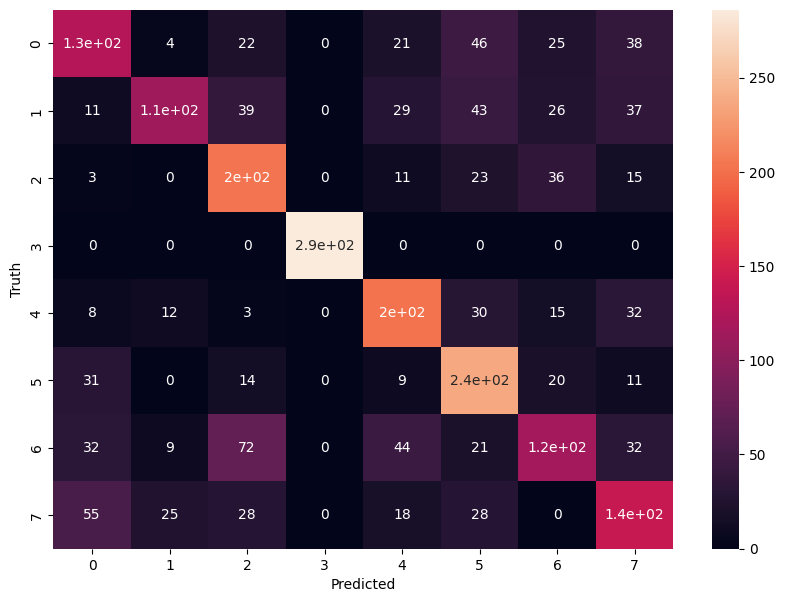

In [90]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [91]:
print(classification_report(y_test,y_pred_lr_grid))

              precision    recall  f1-score   support

           0       0.48      0.45      0.46       283
           1       0.69      0.38      0.49       297
           2       0.53      0.70      0.60       291
           3       1.00      1.00      1.00       286
           4       0.60      0.67      0.64       302
           5       0.55      0.74      0.63       321
           6       0.49      0.36      0.41       326
           7       0.46      0.48      0.47       294

    accuracy                           0.59      2400
   macro avg       0.60      0.59      0.59      2400
weighted avg       0.60      0.59      0.58      2400



### Checking for overfitting and underfitting

In [92]:
# Checking for overfitting and underfitting

print('Training set score: {:.4f}'.format(lr_grid.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lr_grid.score(X_test, y_test)))

Training set score: 0.6066
Test set score: 0.5925


The training-set accuracy score is `0.8975` while the test-set accuracy to be `0.8941`. These two values are quite comparable. So, there is no sign of overfitting

### Extreme Gradient Boosting 

In [93]:
xgb = XGBClassifier()
param_grid_xgb = {'max_depth':[5,10,15],
                 'learning_rate':[0.1,0.01,0.001],
                  'n_estimators':[9,10,11,12],
#                   'seed':[10,20,25]
                 }
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,cv= 10,scoring='accuracy',n_jobs=-1)
grid_search_xgb.fit(X_train,y_train)

xgb_params = grid_search_xgb.best_params_
print(xgb_params)

{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 12}


In [94]:
xgb_grid = XGBClassifier(**xgb_params)
xgb_grid.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=12, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [95]:
y_pred_xgb_grid = xgb_grid.predict(X_test)

In [96]:
y_train_xgb_grid= xgb_grid.predict(X_train)

In [97]:
xgb_acc = accuracy_score(y_test, y_pred_xgb_grid) * 100
print("Accuracy =", xgb_acc)
cm=confusion_matrix(y_test, y_pred_xgb_grid)

Accuracy = 96.04166666666667


In [98]:
train_xgb_acc = accuracy_score(y_train, y_train_xgb_grid) * 100
print("Accuracy =", train_xgb_acc)

Accuracy = 99.30357142857143


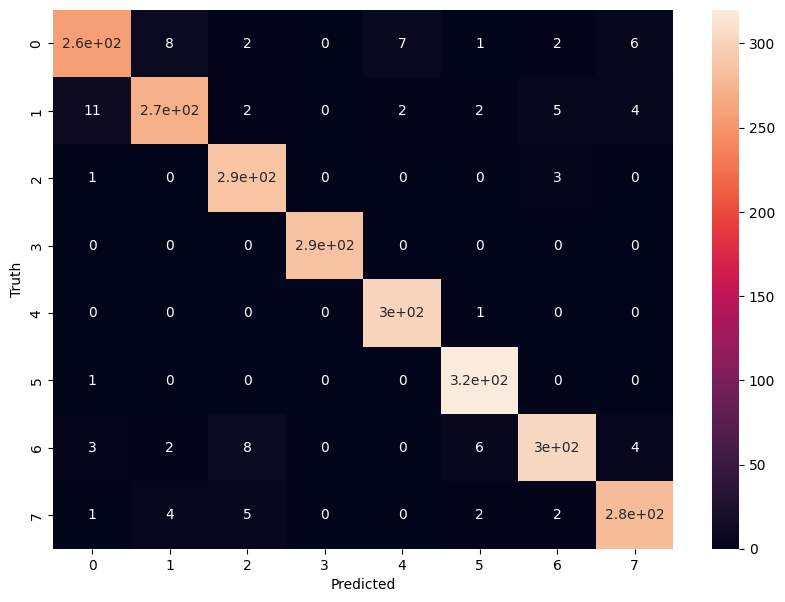

In [99]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [100]:
print(classification_report(y_test,y_pred_xgb_grid))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       283
           1       0.95      0.91      0.93       297
           2       0.94      0.99      0.96       291
           3       1.00      1.00      1.00       286
           4       0.97      1.00      0.98       302
           5       0.96      1.00      0.98       321
           6       0.96      0.93      0.95       326
           7       0.95      0.95      0.95       294

    accuracy                           0.96      2400
   macro avg       0.96      0.96      0.96      2400
weighted avg       0.96      0.96      0.96      2400



### Checking for overfitting and underfitting

In [101]:
# Checking for overfitting and underfitting

print('Training set score: {:.4f}'.format(xgb_grid.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(xgb_grid.score(X_test, y_test)))

Training set score: 0.9930
Test set score: 0.9604


The training-set accuracy score is `0.9927` while the test-set accuracy to be `0.9663`. These two values are comparable. So, there is no sign of overfitting and underfitting.

### Bernoulli  Naive Bayes 

In [102]:
nb = BernoulliNB()
param_grid_nb = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          #'class_prior': [None, [0.1,]* len(n_classes)],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

grid_search_nb = GridSearchCV(estimator=nb,param_grid=param_grid_nb,scoring='accuracy',cv =10)
grid_search_nb.fit(X_train,y_train)

nb_params = grid_search_nb.best_params_
print(nb_params)

{'alpha': 0.1, 'binarize': 0.0, 'fit_prior': True}


In [103]:
nb_grid = BernoulliNB(**nb_params)
nb_grid.fit(X_train,y_train)

BernoulliNB(alpha=0.1)

In [104]:
y_pred_nb_grid = nb_grid.predict(X_test)

In [105]:
y_train_nb_grid = nb_grid.predict(X_train)

In [106]:
nb_acc = accuracy_score(y_test, y_pred_nb_grid) * 100
print("Accuracy =", nb_acc)
cm = confusion_matrix(y_test, y_pred_nb_grid)

Accuracy = 53.083333333333336


In [107]:
train_nb_acc = accuracy_score(y_train, y_train_nb_grid) * 100
print("Accuracy =", train_nb_acc)

Accuracy = 53.589285714285715


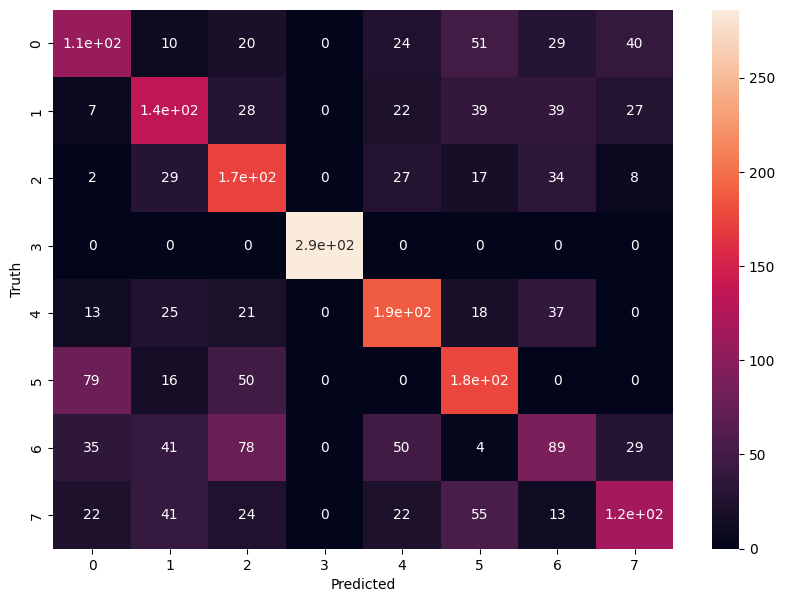

In [108]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [109]:
print(classification_report(y_test,y_pred_nb_grid))

              precision    recall  f1-score   support

           0       0.41      0.39      0.40       283
           1       0.45      0.45      0.45       297
           2       0.44      0.60      0.51       291
           3       1.00      1.00      1.00       286
           4       0.56      0.62      0.59       302
           5       0.49      0.55      0.52       321
           6       0.37      0.27      0.31       326
           7       0.53      0.40      0.45       294

    accuracy                           0.53      2400
   macro avg       0.53      0.53      0.53      2400
weighted avg       0.53      0.53      0.53      2400



### Checking for overfitting and underfitting

In [110]:
# Checking for overfitting and underfitting

print('Training set score: {:.4f}'.format(nb_grid.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(nb_grid.score(X_test, y_test)))

Training set score: 0.5359
Test set score: 0.5308


The training-set accuracy score is `0.5209` while the test-set accuracy to be `0.5179`. These two values are comparable. So, there is no sign of overfitting

### Support Vector Classifier

In [111]:
svc = SVC()
param_grid_svc = {'kernel':['linear','poly','rbf', 'sigmoid'],
                  'class_weight':['balanced'],  
                  'C':[0.1,0.001,0.01,1]
                 }

grid_search_svc = GridSearchCV(estimator=svc,param_grid=param_grid_svc,cv= 10,scoring='accuracy',n_jobs=-1)
grid_search_svc.fit(X_train,y_train)

svc_params = grid_search_svc.best_params_
print(svc_params)

{'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}


In [112]:
svc_grid = SVC(**svc_params,probability=True)
svc_grid.fit(X_train,y_train)

SVC(C=1, class_weight='balanced', probability=True)

In [113]:
y_pred_svc_grid = svc_grid.predict(X_test)

In [114]:
y_train_svc_grid = svc_grid.predict(X_train)

In [115]:
svc_acc = accuracy_score(y_test, y_pred_svc_grid) * 100
print("Accuracy =", svc_acc)
cm = confusion_matrix(y_test, y_pred_svc_grid)

Accuracy = 92.125


In [116]:
train_svc_acc = accuracy_score(y_train, y_train_svc_grid) * 100
print("Accuracy =", train_svc_acc)

Accuracy = 92.23214285714286


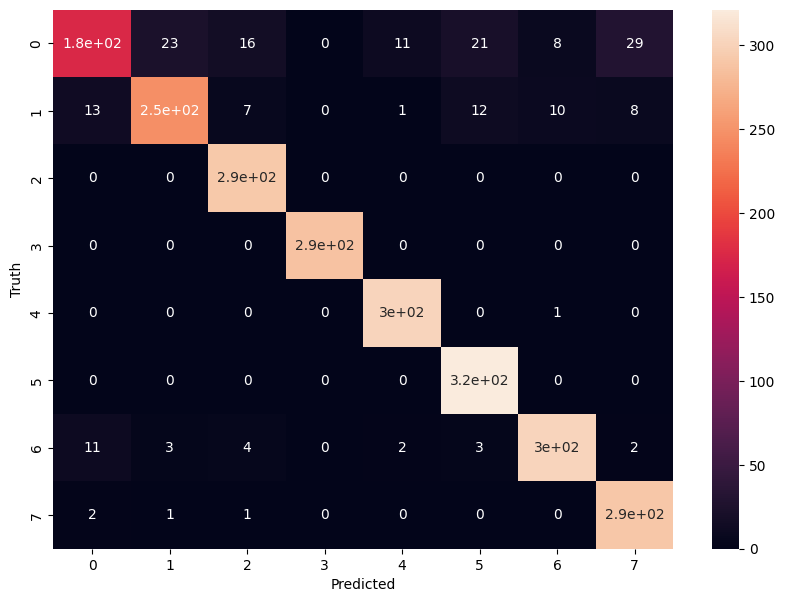

In [117]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [118]:
print(classification_report(y_test,y_pred_svc_grid))

              precision    recall  f1-score   support

           0       0.87      0.62      0.72       283
           1       0.90      0.83      0.86       297
           2       0.91      1.00      0.95       291
           3       1.00      1.00      1.00       286
           4       0.96      1.00      0.98       302
           5       0.90      1.00      0.95       321
           6       0.94      0.92      0.93       326
           7       0.88      0.99      0.93       294

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



### Checking for overfitting and underfitting

In [119]:
# Checking for overfitting and underfitting

print('Training set score: {:.4f}'.format(svc_grid.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc_grid.score(X_test, y_test)))

Training set score: 0.9223
Test set score: 0.9213


The training-set accuracy score is `0.9293` while the test-set accuracy to be `0.9179`. These two values are comparable. So, there is no sign of overfitting and underfitting.

### K-Nearest Neighbour 

In [120]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors':[5,10,15,20],
                 'weights':['uniform','distance']}

grid_search_knn = GridSearchCV(estimator=knn,param_grid=param_grid_knn,cv= 10,scoring='f1',n_jobs=-1)
grid_search_knn.fit(X_train,y_train)

knn_params = grid_search_knn.best_params_
print(knn_params)

{'n_neighbors': 5, 'weights': 'uniform'}


In [121]:
knn_grid = KNeighborsClassifier(**knn_params)
knn_grid.fit(X_train,y_train)

KNeighborsClassifier()

In [122]:
y_pred_knn_grid = knn_grid.predict(X_test)

In [123]:
y_train_knn_grid = knn_grid.predict(X_train)

In [124]:
knn_acc = accuracy_score(y_test, y_pred_knn_grid) * 100
print("Accuracy =", knn_acc)
cm = confusion_matrix(y_test, y_pred_knn_grid)

Accuracy = 94.0


In [125]:
train_knn_acc = accuracy_score(y_train, y_train_knn_grid) * 100
print("Accuracy =", train_knn_acc)

Accuracy = 95.19642857142857


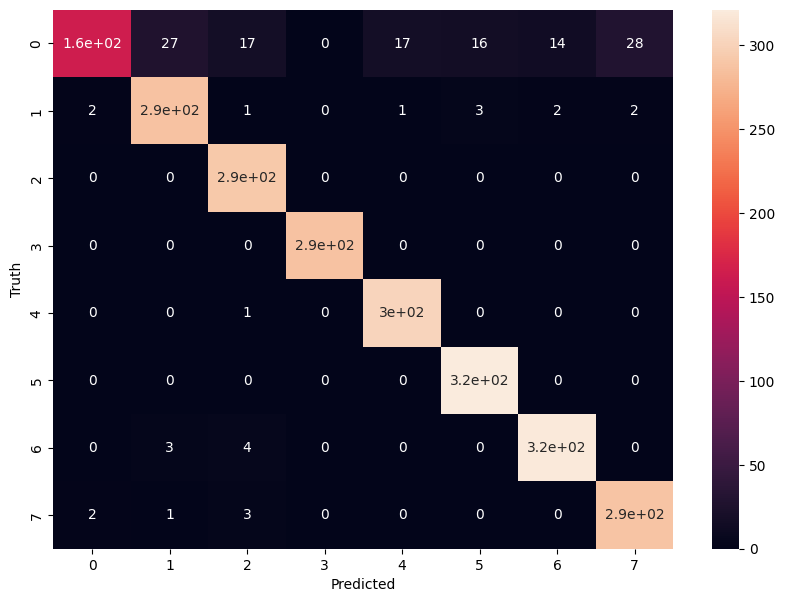

In [126]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [127]:
print(classification_report(y_test,y_pred_knn_grid))

              precision    recall  f1-score   support

           0       0.98      0.58      0.73       283
           1       0.90      0.96      0.93       297
           2       0.92      1.00      0.96       291
           3       1.00      1.00      1.00       286
           4       0.94      1.00      0.97       302
           5       0.94      1.00      0.97       321
           6       0.95      0.98      0.97       326
           7       0.91      0.98      0.94       294

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.93      2400
weighted avg       0.94      0.94      0.93      2400



### Checking for overfitting and underfitting

In [128]:
# Checking for overfitting and underfitting

print('Training set score: {:.4f}'.format(knn_grid.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_grid.score(X_test, y_test)))

Training set score: 0.9520
Test set score: 0.9400


The training-set accuracy score is `0.9520` while the test-set accuracy to be `0.9408`. These two values are comparable. So, there is no sign of overfitting and underfitting.

### Decision Tree Classifier

In [129]:
dc = DecisionTreeClassifier()
param_grid_des =  {'max_depth': [5,10,15],
                   'min_samples_split': [4,6,8],
                   'min_samples_leaf': [1, 2, 4]
                  }
grid_search_des = GridSearchCV(estimator = dc,param_grid = param_grid_des, cv = 10,scoring ='accuracy',n_jobs=-1)
grid_search_des.fit(X_train,y_train)

des_params = grid_search_des.best_params_
print(des_params)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [130]:
dc_grid = DecisionTreeClassifier(**des_params)
dc_grid.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=4)

In [131]:
y_pred_dc_grid = dc_grid.predict(X_test)

In [132]:
y_train_dc_grid = dc_grid.predict(X_train)

In [133]:
dc_acc = accuracy_score(y_test, y_pred_dc_grid) * 100
print("Accuracy =", dc_acc)
cm = confusion_matrix(y_test, y_pred_dc_grid)

Accuracy = 90.70833333333333


In [134]:
train_dc_acc = accuracy_score(y_train, y_train_dc_grid) * 100
print("Accuracy =", train_dc_acc)

Accuracy = 96.92857142857143


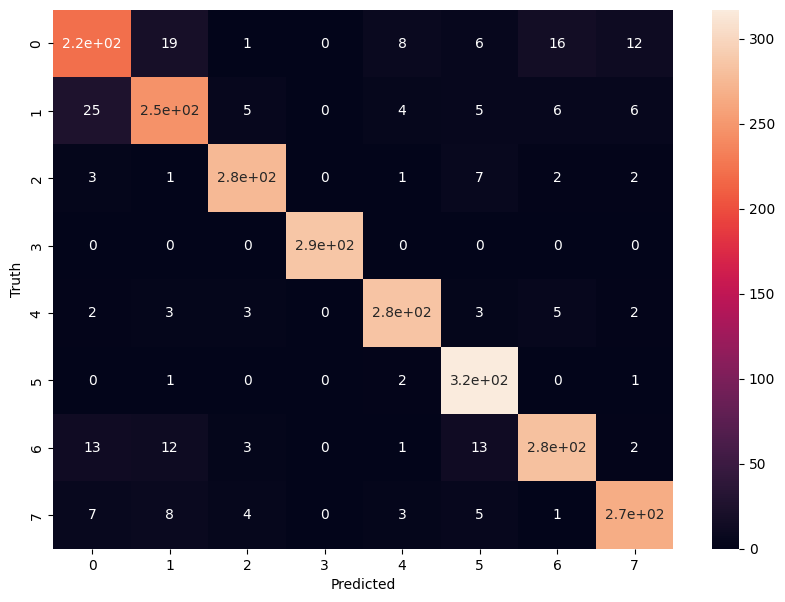

In [135]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [136]:
print(classification_report(y_test,y_pred_dc_grid))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       283
           1       0.85      0.83      0.84       297
           2       0.95      0.95      0.95       291
           3       1.00      1.00      1.00       286
           4       0.94      0.94      0.94       302
           5       0.89      0.99      0.94       321
           6       0.90      0.87      0.88       326
           7       0.91      0.90      0.91       294

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400



### Checking for overfitting and underfitting

In [137]:
# Checking for overfitting and underfitting

print('Training set score: {:.4f}'.format(dc_grid.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dc_grid.score(X_test, y_test)))

Training set score: 0.9693
Test set score: 0.9071


The training-set accuracy score is `0.9595` while the test-set accuracy to be `0.9038`. These two values are quite comparable. So, there is no sign of overfitting

### Random Forest Classifier

In [138]:
rf =  RandomForestClassifier()
# param_grid_ran = {
#     'criterion':['gini','entropy'],
#     'max_leaf_nodes':[50,60,70],
#     'max_depth':[2,4,6],
#     'max_features':['auto','log2']
# }

param_grid_ran = {
    'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'max_features': ['sqrt', 'log2'],
#     'n_estimators': [100, 200, 300]
}

grid_search_ran = GridSearchCV(estimator=rf,param_grid=param_grid_ran,cv=10,scoring='accuracy')
grid_search_ran.fit(X_train,y_train)

ran_params = grid_search_ran.best_params_
print(ran_params)

{'max_depth': 15}


In [139]:
rf_grid = RandomForestClassifier(**ran_params)
rf_grid.fit(X_train,y_train)

RandomForestClassifier(max_depth=15)

In [140]:
y_pred_rf_grid = rf_grid.predict(X_test)

In [141]:
y_train_rf_grid = rf_grid.predict(X_train)

In [142]:
rf_acc = accuracy_score(y_test, y_pred_rf_grid) * 100
print("Accuracy =", rf_acc)
cm = confusion_matrix(y_test, y_pred_rf_grid)

Accuracy = 97.79166666666667


In [143]:
train_rf_acc = accuracy_score(y_train, y_train_rf_grid) * 100
print("Accuracy =", train_rf_acc)

Accuracy = 99.91071428571429


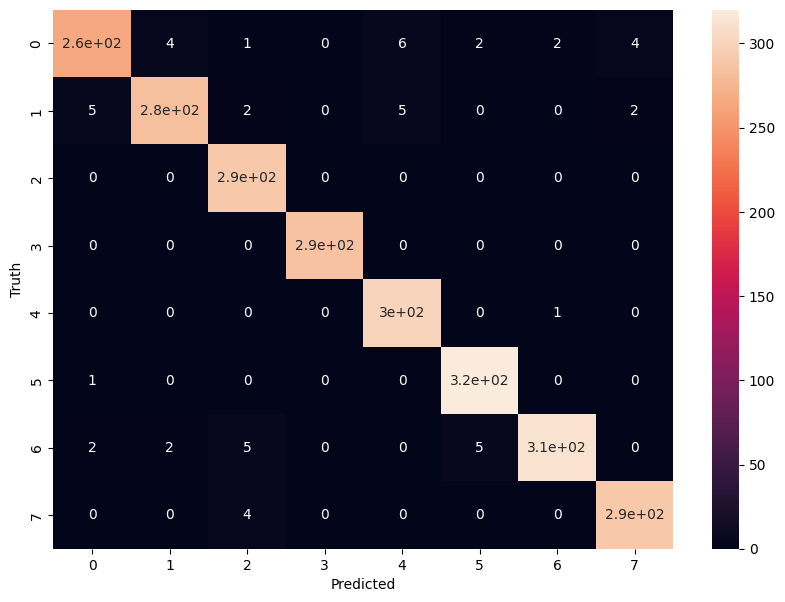

In [144]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [145]:
print(classification_report(y_test,y_pred_rf_grid))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       283
           1       0.98      0.95      0.97       297
           2       0.96      1.00      0.98       291
           3       1.00      1.00      1.00       286
           4       0.96      1.00      0.98       302
           5       0.98      1.00      0.99       321
           6       0.99      0.96      0.97       326
           7       0.98      0.99      0.98       294

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



### Checking for overfitting and underfitting

In [146]:
# Checking for overfitting and underfitting

print('Training set score: {:.4f}'.format(rf_grid.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf_grid.score(X_test, y_test)))

Training set score: 0.9991
Test set score: 0.9779


The training-set accuracy score is `0.9989` while the test-set accuracy to be `0.9825`. These two values are quite comparable. So, there is no sign of overfitting

### Stochastic Gradient Descent Classifier 

In [147]:
sgd =  SGDClassifier()
param_grid_sgd = {
     
    #'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [3000,5000,7000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2']
}

grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=param_grid_sgd,cv= 10,scoring='accuracy')
grid_search_sgd.fit(X_train,y_train)

sgd_params = grid_search_sgd.best_params_
print(sgd_params)

{'loss': 'log', 'max_iter': 7000, 'penalty': 'l2'}


In [148]:
sgd_grid = SGDClassifier(**sgd_params)
sgd_grid.fit(X_train,y_train)

SGDClassifier(loss='log', max_iter=7000)

In [149]:
y_pred_sgd_grid = sgd_grid.predict(X_test)

In [150]:
y_train_sgd_grid = sgd_grid.predict(X_train)

In [151]:
sgd_acc = accuracy_score(y_test, y_pred_sgd_grid) * 100
print("Accuracy =", sgd_acc)
cm = confusion_matrix(y_test, y_pred_sgd_grid)

Accuracy = 58.333333333333336


In [152]:
train_sgd_acc = accuracy_score(y_train, y_train_sgd_grid) * 100
print("Accuracy =", train_sgd_acc)

Accuracy = 58.80357142857143


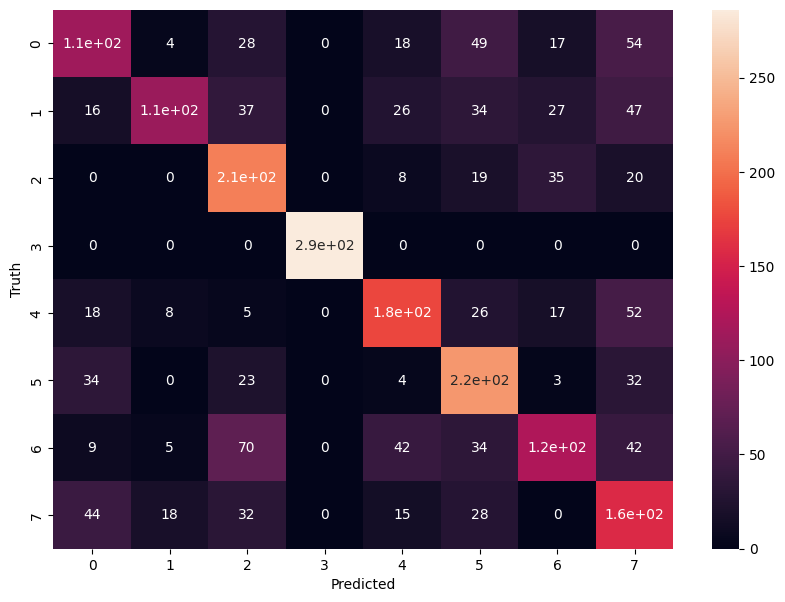

In [153]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [154]:
print(classification_report(y_test,y_pred_sgd_grid))

              precision    recall  f1-score   support

           0       0.48      0.40      0.44       283
           1       0.76      0.37      0.50       297
           2       0.52      0.72      0.60       291
           3       1.00      1.00      1.00       286
           4       0.61      0.58      0.60       302
           5       0.54      0.70      0.61       321
           6       0.56      0.38      0.45       326
           7       0.39      0.53      0.45       294

    accuracy                           0.58      2400
   macro avg       0.61      0.59      0.58      2400
weighted avg       0.60      0.58      0.58      2400



### Checking for overfitting and underfitting

In [155]:
# Checking for overfitting and underfitting

print('Training set score: {:.4f}'.format(sgd_grid.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(sgd_grid.score(X_test, y_test)))

Training set score: 0.5880
Test set score: 0.5833


The training-set accuracy score is `0.5900` while the test-set accuracy to be `0.5892`. These two values are comparable. So, there is no sign of overfitting and underfitting.

## Combining all Models

In [156]:
model_df = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Extreme Gradient Boost','K-Nearest Neighbour',
                                   'Decision Tree','BernoulliNB', 'Support Vector Classifier','Stochastic Gradient Descent'],
                        'Training Accuracy':[train_lr_acc,train_rf_acc,train_xgb_acc,train_knn_acc,train_dc_acc,train_nb_acc,train_svc_acc,train_sgd_acc],
                        'Testing Accuracy':[lr_acc,rf_acc,xgb_acc,knn_acc,dc_acc,nb_acc,svc_acc,sgd_acc]})

In [157]:
model_df.sort_values(['Testing Accuracy'],ascending=False,ignore_index=True)

Model  Training Accuracy  Testing Accuracy
0                Random Forest          99.910714         97.791667
1       Extreme Gradient Boost          99.303571         96.041667
2          K-Nearest Neighbour          95.196429         94.000000
3    Support Vector Classifier          92.232143         92.125000
4                Decision Tree          96.928571         90.708333
5          Logistic Regression          60.660714         59.250000
6  Stochastic Gradient Descent          58.803571         58.333333
7                  BernoulliNB          53.589286         53.083333

In [158]:
f,axe = plt.subplots(figsize=(20,15),dpi=500)
sns.barplot(x='Testing Accuracy', y='Model', data=model_df, ax = axe )
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Classification Models', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(model_df['Testing Accuracy'].values,2)):
    axe.text(v + 0, i + .2, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12,)

plt.show()

### Saving the model

In [193]:
filename = "rf_model.pkl"
pickle.dump(rf_grid, open(filename,'wb'))

In [199]:
pickled_model = pickle.load(open('rf_model.pkl','rb'))

In [200]:
pred_output = pickled_model.predict(X_test)

In [201]:
pred_output[0:50]

array([4, 4, 4, 0, 2, 6, 4, 2, 1, 2, 1, 5, 7, 0, 4, 1, 1, 5, 4, 0, 2, 1,
       2, 5, 4, 3, 5, 0, 2, 2, 3, 4, 7, 3, 2, 3, 3, 4, 4, 2, 3, 3, 0, 6,
       2, 5, 4, 4, 6, 0], dtype=int64)

In [222]:
input_data = (52.0,1,0,100.0,180.0,0.0,5.0,0.0,3.0,0.0,4.0,0.11,2.0,0.0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [223]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped

array([[5.2e+01, 1.0e+00, 0.0e+00, 1.0e+02, 1.8e+02, 0.0e+00, 5.0e+00,
        0.0e+00, 3.0e+00, 0.0e+00, 4.0e+00, 1.1e-01, 2.0e+00, 0.0e+00]])

In [224]:
prediction = pickled_model.predict(input_data_reshaped)
print(prediction)

if (prediction == 0):
    print('Unknown (alive)')
elif (prediction == 1):
    print('Cardiogenic shock')
elif (prediction == 2):
    print('Pulmonary edema')
elif (prediction == 3):
    print('Myocardial Rupture')
elif (prediction == 4):
    print('Progress of congestive heart failure')
elif (prediction == 5):
    print('Thromboembolism')
elif (prediction == 6):
    print('Asystole')
elif (prediction == 7):
    print('Ventricular fibrillation')

[0]
Unknown (alive)


2023-05-15 18:52:11,197 - INFO     - Executing shutdown due to inactivity...
2023-05-15 18:52:23,442 - INFO     - Executing shutdown...
2023-05-15 18:52:23,450 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "C:\Users\Nishant\anaconda3\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Nishant\anaconda3\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Nishant\anaconda3\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Nishant\anaconda3\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\Nishant\anaconda3\lib\site-packages\dtale\app.py", line 438, in shutdown
    shutdown_server()
  File "C:\Users\Nishant\anaconda3\lib\site-packages\dtale\a